In [4]:
from __future__ import print_function, division

In [5]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml

In [6]:
# function converts string to float
def convert_numeric(df, str_cols):
    for i in str_cols:
        df[i] = df[i].astype(float)


### STEP 1: NBA per minute stats

In [7]:
def scrape_per_min_stats(year):
    # main url - change year parameter to get different years
    url = 'https://www.basketball-reference.com/leagues/NBA_'+ str(year) + '_per_minute.html'
    response = requests.get(url)
    page = response.text
    
    soup = BeautifulSoup(page, "html.parser") 
    
    # grab correct col names
    cols =  soup.find('thead').text.split('\n')
    cols_clean = cols[3:-2]
    
    # start to collect data from table to list of lists
    table = soup.find('tbody')
    rows = table.find_all('tr')

    data1 = []
    for tr in rows:
        cols = tr.find_all('td')
        x = []
        for td in cols:
            if td.getText() != '':
                x.append(td.text)
            else:
                x.append('0')
        data1.append(x)
        
    # convert to pandas DF
    Table = pd.DataFrame(data1)
    Table.columns = cols_clean
    
    # string cols to convert
    str_cols = [Table.columns[2]] + Table.columns[4:].tolist()

    
    # drop NAs, reset index
    Table.dropna(how='all', inplace=True)
    Table.reset_index(drop=True, inplace=True)
    
    # convert cols to numeric
    convert_numeric(Table, str_cols)
    
    # drop duplicates
    Table1 = Table.sort_values('G', ascending=False).drop_duplicates('Player').sort_index()
    Table1['Year'] = year

    return Table1

In [8]:
# Test Code
# main url - change year parameter to get different years
# url = 'https://www.basketball-reference.com/leagues/NBA_2016_per_minute.html'
# response = requests.get(url)
# page = response.text
    
# soup = BeautifulSoup(page, "html.parser") 
    
#     # grab correct col names
# cols =  soup.find('thead').text.split('\n')
# cols_clean = cols[3:-2]
    
#     # start to collect data from table to list of lists
# table = soup.find('tbody')
# rows = table.find_all('tr')

# data1 = []
# for tr in rows:
#     cols = tr.find_all('td')
#     x = []
#     for td in cols:
#         if td.getText() != '':
#             x.append(td.text)
#         else:
#             x.append('0')
#     data1.append(x)
        
#     # convert to pandas DF
# Table = pd.DataFrame(data1)
#     #    Table.columns = cols_clean
    
#     # string cols to convert
#     #    str_cols = [Table.columns[2]] + Table.columns[4:].tolist()

    
#     # drop NAs, reset index
# Table.dropna(how='all', inplace=True)
# Table.reset_index(drop=True, inplace=True)
    
    # convert cols to numeric
    # convert_numeric(Table, str_cols)
    
    # drop duplicates
    #  Table1 = Table.sort_values('G', ascending=False).drop_duplicates('Player').sort_index()
    #  Table1['Year'] = year

    # return Table1

In [9]:
# 2013 - 2017 data
data_per_min_2017 = scrape_per_min_stats(2017)
data_per_min_2016 = scrape_per_min_stats(2016)
data_per_min_2015 = scrape_per_min_stats(2015)
data_per_min_2014 = scrape_per_min_stats(2014)
data_per_min_2013 = scrape_per_min_stats(2013)

print("\nunique players (cohort counts): ")
print(data_per_min_2017.Player.nunique())
print(data_per_min_2016.Player.nunique())
print(data_per_min_2015.Player.nunique())




unique players (cohort counts): 
486
476
492


In [10]:
# Merge 3 years together for 3 cohort years. This will be used for historical trends.
# ie. one cohort includes data from 2015, 2016, and 2017. The next includes data from 2014, 2015, and 2016, etc.

data_per_min_15_17 = pd.concat([data_per_min_2015, data_per_min_2016, data_per_min_2017], ignore_index=True)

data_per_min_14_16 = pd.concat([data_per_min_2014, data_per_min_2014, data_per_min_2016], ignore_index=True)

data_per_min_13_15 = pd.concat([data_per_min_2013, data_per_min_2014, data_per_min_2015], ignore_index=True)

print("shape:")
print(data_per_min_15_17.shape[0])
print(data_per_min_14_16.shape[0])
print(data_per_min_13_15.shape[0])
print("\nunique players: ")
print(data_per_min_15_17.Player.nunique())
print(data_per_min_14_16.Player.nunique())
print(data_per_min_13_15.Player.nunique())


shape:
1454
1438
1441

unique players: 
665
624
651


In [11]:
data_per_min_2016.head(30)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Quincy Acy,PF,25.0,SAC,59.0,29.0,876.0,4.9,8.8,0.556,...,2.7,5.1,7.7,1.1,1.2,1.0,1.1,4.2,12.6,2016
1,Jordan Adams,SG,21.0,MEM,2.0,0.0,15.0,4.8,14.4,0.333,...,0.0,4.8,4.8,7.2,7.2,0.0,4.8,4.8,16.8,2016
2,Steven Adams,C,22.0,OKC,80.0,80.0,2014.0,4.7,7.6,0.613,...,3.9,5.6,9.5,1.1,0.8,1.6,1.5,4.0,11.4,2016
3,Arron Afflalo,SG,30.0,NYK,71.0,57.0,2371.0,5.4,12.1,0.443,...,0.3,3.7,4.0,2.2,0.4,0.2,1.2,2.2,13.8,2016
4,Alexis Ajinca,C,27.0,NOP,59.0,17.0,861.0,6.3,13.2,0.476,...,3.1,8.1,11.2,1.3,0.8,1.5,2.3,5.6,14.7,2016
5,Cole Aldrich,C,27.0,LAC,60.0,5.0,800.0,6.0,10.1,0.596,...,3.9,9.1,13.0,2.3,2.1,3.1,2.9,6.3,14.8,2016
6,LaMarcus Aldridge,PF,30.0,SAS,74.0,74.0,2261.0,8.5,16.6,0.513,...,2.8,7.3,10.1,1.8,0.6,1.3,1.6,2.4,21.2,2016
7,Cliff Alexander,PF,20.0,POR,8.0,0.0,36.0,5.0,10.0,0.500,...,2.0,4.0,6.0,0.0,1.0,2.0,1.0,1.0,10.0,2016
8,Lavoy Allen,PF,26.0,IND,79.0,28.0,1599.0,4.3,8.3,0.516,...,3.6,5.9,9.5,1.7,0.6,0.9,1.6,3.3,9.6,2016
9,Tony Allen,SG,34.0,MEM,64.0,57.0,1620.0,4.8,10.4,0.458,...,2.3,4.3,6.6,1.6,2.4,0.4,1.7,3.9,11.9,2016


In [12]:
data_per_min_2015.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Quincy Acy,PF,24.0,NYK,68.0,22.0,1287.0,4.3,9.3,0.459,...,2.2,6.2,8.4,1.9,0.8,0.6,1.7,4.1,11.1,2015
1,Jordan Adams,SG,20.0,MEM,30.0,0.0,248.0,5.1,12.5,0.407,...,1.3,2.8,4.1,2.3,2.3,1.0,2.0,3.5,13.6,2015
2,Steven Adams,C,21.0,OKC,70.0,67.0,1771.0,4.4,8.1,0.544,...,4.0,6.6,10.6,1.3,0.8,1.7,2.0,4.5,10.9,2015
3,Jeff Adrien,PF,28.0,MIN,17.0,0.0,215.0,3.2,7.4,0.432,...,3.9,9.0,12.9,2.5,0.7,1.5,1.5,5.0,10.0,2015
4,Arron Afflalo,SG,29.0,TOT,78.0,72.0,2502.0,5.4,12.7,0.424,...,0.4,3.2,3.6,1.9,0.6,0.1,1.7,2.4,14.9,2015


In [13]:
data_per_min_15_17.Player.nunique()

665

#### Pickle data

In [14]:
data_per_min_15_17.to_pickle('data/data_per_min_15_17.pkl')
data_per_min_14_16.to_pickle('data/data_per_min_14_16.pkl')
data_per_min_13_15.to_pickle('data/data_per_min_13_15.pkl')

### Data 2: NBA Advanced Stats

In [15]:
def scrape_advanced_stats(year):
    url = 'https://www.basketball-reference.com/leagues/NBA_' + str(year) + '_advanced.html'
    
    soup = BeautifulSoup(requests.get(url).text, "html.parser")
    table = soup.find('tbody')
    
    col_names = ['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',\
          'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'DONOTUSE1',\
          'OWS', 'DWS', 'WS', 'WS/48', 'DONOTUSE2','OBPM', 'DBPM', 'BPM', 'VORP']
    
    # convert to list of lists
    rows = table.find_all('tr')

    data = []
    for tr in rows:
        cols = tr.find_all('td')
        x = []
        for td in cols:
            if td.getText() != '':
                x.append(td.text)
            else:
                x.append('0')
        data.append(x)
       
    # convert to DF and add col names
    data_adv = pd.DataFrame(data)
    data_adv.columns = col_names
    
     
    # drop NAs, reset index
    data_adv.dropna(how='all', inplace=True)
    data_adv.reset_index(drop=True, inplace=True)
    
    # convert string cols to numeric
    str_cols = [data_adv.columns[2]] + data_adv.columns[4:].tolist()
    convert_numeric(data_adv, str_cols)

    # dedup - This happens if a player was on multiple teams in the same season
    data_adv = data_adv.sort_values('G', ascending=False).drop_duplicates('Player').sort_index()
    
    # drop unneeded cols
    data_adv = data_adv.drop(['Pos','Age', 'Tm', 'G', 'MP', 'DONOTUSE1', 'DONOTUSE2'], 1)
   
    data_adv['Year'] = year

    return data_adv



In [16]:
advanced_stats_2017 = scrape_advanced_stats(2017)
advanced_stats_2016 = scrape_advanced_stats(2016)
advanced_stats_2015 = scrape_advanced_stats(2015)
advanced_stats_2014 = scrape_advanced_stats(2014)
advanced_stats_2013 = scrape_advanced_stats(2013)

In [17]:
# Merge 3 years together
data_advanced_15_17 = pd.concat([advanced_stats_2015, advanced_stats_2016, advanced_stats_2017], ignore_index=True)
data_advanced_14_16 = pd.concat([advanced_stats_2014, advanced_stats_2015, advanced_stats_2016], ignore_index=True)
data_advanced_13_15 = pd.concat([advanced_stats_2013, advanced_stats_2014, advanced_stats_2015], ignore_index=True)

print(data_advanced_15_17.shape)
print(data_advanced_14_16.shape)
print(data_advanced_13_15.shape)

(1454, 22)
(1449, 22)
(1441, 22)


In [176]:
data_advanced_15_17.columns

Index(['Player', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')

In [181]:
data_advanced_15_17[data_advanced_15_17['Player'] == 'Stephen Curry'][['Year','Player','PER','STL%', 'AST%','OWS','BLK%']].reset_index(drop=True)
# [['NAME','TEAM','Contract_Yr','PER_3AVG', 'MP_3AVG']]

,Year,Player,PER,STL%,AST%,OWS,BLK%
0,2015,Stephen Curry,28.0,3.0,38.6,11.5,0.5
1,2016,Stephen Curry,31.5,3.0,33.7,13.8,0.4
2,2017,Stephen Curry,24.6,2.6,31.2,8.7,0.5


#### - Pickle data -

In [18]:
data_advanced_15_17.to_pickle('data/data_advanced_15_17.pkl')
data_advanced_14_16.to_pickle('data/data_advanced_14_16.pkl')
data_advanced_13_15.to_pickle('data/data_advanced_13_15.pkl')

In [19]:
data_advanced_15_17.Player.nunique()

665

In [20]:
data_advanced_15_17[data_advanced_15_17['Player'] == 'Sam Dekker']

,Player,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
603,Sam Dekker,10.8,0.000,0.000,0.000,0.0,18.5,9.2,0.0,8.2,...,0.0,0.0,0.0,0.0,0.116,-5.3,5.8,0.5,0.0,2016
1071,Sam Dekker,13.1,0.549,0.436,0.159,7.2,14.6,10.9,7.7,1.3,...,14.9,1.9,1.2,3.1,0.104,-0.4,-0.6,-1.0,0.3,2017


In [21]:
data_advanced_15_17.head()

,Player,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Quincy Acy,11.9,0.533,0.181,0.293,6.9,20.5,13.5,8.7,1.1,...,15.5,1.0,0.7,1.7,0.063,-2.3,-0.8,-3.1,-0.3,2015
1,Jordan Adams,12.8,0.489,0.291,0.267,4.2,8.7,6.4,10.1,3.4,...,20.4,0.0,0.4,0.4,0.073,-1.8,1.2,-0.6,0.1,2015
2,Steven Adams,14.1,0.549,0.005,0.514,12.2,19.3,15.8,5.5,1.1,...,14.3,1.9,2.2,4.1,0.111,-1.4,1.8,0.4,1.1,2015
3,Jeff Adrien,14.2,0.494,0.000,0.864,11.9,29.6,20.5,10.5,0.9,...,14.3,0.2,0.2,0.4,0.087,-2.7,0.5,-2.2,0.0,2015
4,Arron Afflalo,10.7,0.533,0.377,0.224,1.1,9.7,5.3,8.2,0.8,...,19.0,1.6,1.0,2.6,0.050,-0.5,-1.3,-1.8,0.1,2015


### Data3 :Player Contract data


In [22]:
def scrape_contract():
    url = 'https://www.basketball-reference.com/contracts/players.html'
    soup = BeautifulSoup(requests.get(url).text, "html.parser")

    table = soup.find('tbody')
    
    col_names =['Player', 'Tm', '2017_18', '2018_19', '2019_20', 
             '2020_21', '2021_22', '2022_23', 'Signed Using', 'Guaranteed']

    
    # create a list of lists to convert to DF
    rows = table.find_all('tr')

    data = []
    for tr in rows:
        cols = tr.find_all('td')
        x = []
        for td in cols:
            x.append(td.text)
        data.append(x)
        
    Table = pd.DataFrame(data)
    Table.columns = col_names
    return Table

In [23]:
# Extract contract data
contract_data = scrape_contract()

In [24]:
contract_data.head()

,Player,Tm,2017_18,2018_19,2019_20,2020_21,2021_22,2022_23,Signed Using,Guaranteed
0,Stephen Curry,GSW,"$34,682,550","$37,457,154","$40,231,758","$43,006,362","$45,780,966",,Bird Rights,"$201,158,790"
1,LeBron James,CLE,"$33,285,709","$35,607,968",,,,,Early Bird,"$33,285,709"
2,Paul Millsap,DEN,"$31,269,231","$29,730,769","$30,500,000",,,,Cap space,"$61,000,000"
3,Gordon Hayward,BOS,"$29,727,900","$31,214,295","$32,700,690","$34,187,085",,,Cap space,"$93,642,885"
4,Blake Griffin,LAC,"$29,512,900","$31,873,932","$34,234,964","$36,595,996","$38,957,028",,Bird Rights,"$132,217,792"


In [25]:
# Actually Keep a couple columns
contract_clean = contract_data[['Player', 'Tm', '2017_18']].reset_index(drop=True)
contract_clean['2017_18'] =  (contract_clean['2017_18'].replace( '[\$,)]','', regex=True ).astype(float))
#contract_clean['year']
contract_clean.head()

,Player,Tm,2017_18
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,LAC,29512900.0


In [26]:
### extract name
def get_name(col):
    return(col.split(",",1)[0])


In [27]:

def scrape_espn_contract(season, pages):
    # base url
    url_espn ='http://www.espn.com/nba/salaries/_/year/'
    # Example: http://www.espn.com/nba/salaries/_/year/2017/page/2/seasontype/1
    # create list of urls, since they span multiple pages
    # this list comprehension takes 'SEASON' and 'PAGES' parameters
    url_list = [url_espn + str(season) + '/page/' + str(i) + '/seasontype/1' for i in range(1, pages + 1)]
    
    appended_data = []
    
    # cycle through pages
    for url in url_list:
        
        soup = BeautifulSoup(requests.get(url).text, "html.parser")

        rows = soup.find_all('tr')

        col_names = ['NAME', 'TEAM','SALARY']

        data = []
        for tr in rows[1:]:
            cols = tr.find_all('td')[1:]
            x = []
            for td in cols:
                if td.text not in col_names:
                    x.append(td.text)
            data.append(x)

        Table = pd.DataFrame(data)

        # drop NAs
        Table.dropna(how='all', inplace=True)
        Table.reset_index(drop=True, inplace=True)
        # add col names
        Table.columns = col_names

        # Clean some columns, Remove Position from Player Name and Remove $ sign from Salary (change to float)
        Table['Player'] =  Table.apply(lambda x: get_name(x['NAME']), axis=1)
        Table['SALARY'] =  (Table['SALARY'].replace( '[\$,)]','', regex=True ).astype(float))
        Table['Contract_Yr'] = season
        Table['Year'] = season - 1   # this field is used for merging to other tables
        
        appended_data.append(Table)
        
    appended_data = pd.concat(appended_data, axis=0)
    return appended_data

In [28]:
# 3 years of contract data
espn_2018 = scrape_espn_contract(2018, 12)
espn_2017 = scrape_espn_contract(2017, 12)
espn_2016 = scrape_espn_contract(2016, 11)


In [29]:
# Append all contract data together
contract_data = pd.concat([espn_2018, espn_2017, espn_2016], ignore_index=True)


In [30]:
contract_data.Player.nunique()


637

### Data4 : Player Bio data (using Scrapy)


In [31]:
!pwd
# scrapy shell 'https://www.basketball-reference.com/leagues/NBA_2017_advanced.html'

/Users/renkohkato/ds/metisgh/scrapGit/nba


In [32]:
# get some player height
# response.xpath('.//*[@itemprop="height"]/text()').extract()
# [u'7-0']

In [33]:
# 3 years worth of Bio data. No dupes
data_bio = pd.read_json('../../tutorial/player_biov3.json')
# data_bio.College.unique()

In [34]:
# function to convert height (feet + inches -> inches)
def convert_inches(col):
    feet = int(col.split("-",1)[0] )
    inches = int(col.split("-",1)[1] )
    return (12 * feet + inches)

# get number of years
def get_exp(col):
    try:
        yrs = int(col.split(" ",1)[0] )
    except:
        yrs = 0
    return yrs

# Flag Ind - Creates a binary field
def Flag_ind(col):
    if col == "None":
        return 0
    else:
        return 1


In [35]:
# Figure2['height_in'] = Figure2['height'].apply(convert_inches, axis='column')
data_bio['height_in'] =  data_bio.apply(lambda x: convert_inches(x['height']), axis=1)

data_bio['Exp_Yrs'] = data_bio.apply(lambda x: get_exp(x['Exp']), axis=1)
data_bio['College_Ind'] = data_bio.apply(lambda x: Flag_ind(x['College']), axis=1)
data_bio['Award_Ind'] = data_bio.apply(lambda x: Flag_ind(x['bling1']), axis=1)

data_bio = data_bio.drop(['height','url', 'College', 'Exp'], 1)



In [36]:
data_bio.head(20)

,bling1,bling2,name,weight,height_in,Exp_Yrs,College_Ind,Award_Ind
0,None,None,Alex Abrines,190,78,1,0,0
1,None,None,Ron Baker,220,76,1,1,0
2,None,None,Luke Babbitt,225,81,7,1,0
3,2008-09 All-Rookie,None,D.J. Augustin,183,72,9,1,1
4,None,None,Omer Asik,255,84,7,0,0
5,None,None,Darrell Arthur,235,81,8,1,0
6,2008-09 NBA Champ,None,Trevor Ariza,215,80,13,1,1
7,None,None,Reggie Bullock,205,79,4,1,0
8,None,None,Nicolas Brussino,195,79,1,0,0
9,None,None,Omri Casspi,225,81,8,0,0


In [37]:
data_bio.shape

(665, 8)

In [38]:
data_bio.name.nunique()

665

In [39]:
print(data_bio.bling1.value_counts())

None                     431
1x All Star               20
2x All Star               14
2x NBA Champ              11
4x All Star               10
2016-17 All-Rookie        10
2015-16 All-Rookie        10
2014-15 All-Rookie        10
2013-14 NBA Champ          9
2015-16 NBA Champ          9
2013-14 All-Rookie         9
3x All Star                8
2009-10 All-Rookie         7
2014-15 NBA Champ          7
2016-17 NBA Champ          6
2012-13 All-Rookie         6
2010-11 All-Rookie         6
2010-11 NBA Champ          5
2007-08 All-Rookie         5
2011-12 All-Rookie         5
6x All Star                4
2006-07 All-Rookie         4
2008-09 All-Rookie         4
2009-10 All-Defensive      3
5x All Star                3
2005-06 All-Rookie         3
8x All Star                3
2007-08 NBA Champ          3
15x All Star               2
2013-14 All-NBA            2
                        ... 
10x All Star               2
13x All Star               2
2x All-Defensive           2
2002-03 All-Ro

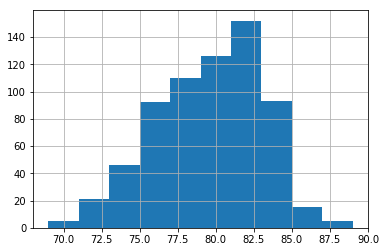

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline  

data_bio.height_in.hist();

### Join Tables

In [41]:
print(data_advanced_15_17.columns)
print(data_per_min_15_17.columns)
print(data_bio.columns)
print(contract_clean.columns)


Index(['Player', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')
Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')
Index(['bling1', 'bling2', 'name', 'weight', 'height_in', 'Exp_Yrs',
       'College_Ind', 'Award_Ind'],
      dtype='object')
Index(['Player', 'Tm', '2017_18'], dtype='object')


In [42]:
pd.set_option('display.max_columns', 500)


### Merge Basic Stats and Advanced Stats Table

In [43]:

# Function that calculates 3 year average stats for basic and advanced stats

def ThreeYr_Avg(advanced_df, basic_df, year):
    '''
    Inputs:
    advanced_df: Dataframe w/ advanced stats
    basic_df: Dataframe w/ basic stats
    year: cohort year

    This function will merge the basic and advanced stats, the compute the 3yr average for these stats.
    Next it will return one record per player, based on the cohort year.
    '''    
    
# first merge the basic and advanced stats
    Merge_stats = pd.merge(advanced_df, basic_df, how='left', on=['Player','Year'], )
    
# calculate the 3yr avg of all stats
    ThreeYr_Avg_Stats = Merge_stats.groupby(['Player']).mean().reset_index()
    
# merge this back to the original data
    ThreeYr_Avg_Stats_PlusAll = pd.merge(Merge_stats, ThreeYr_Avg_Stats,
                                         how='left', on=['Player'], 
                                         sort=True, suffixes=('', '_3AVG')
                                     )
# Filter based on cohort year, to keep max 1 record per player
    ThreeYr_Avg_Stats_F = ThreeYr_Avg_Stats_PlusAll[ThreeYr_Avg_Stats_PlusAll['Year'] == year].reset_index(drop=True)
    
    print("All stats length: ", advanced_df.shape[0], 
          "\nUnique Players:    ", advanced_df.Player.nunique(), 
          "\nFinal Data length: ", ThreeYr_Avg_Stats_F.shape[0])
    return ThreeYr_Avg_Stats_F


In [44]:
# 2017 Cohort Stats Data

data_all_stats_15_17 = ThreeYr_Avg(data_advanced_15_17, data_per_min_15_17, 2017)

data_all_stats_15_17.head()

All stats length:  1454 
Unique Players:     665 
Final Data length:  486


,Player,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,Year_3AVG,Age_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG
0,A.J. Hammons,8.4,0.472,0.238,0.476,5.4,21.0,12.8,3.8,0.3,7.2,16.4,17.6,-0.2,0.2,0.0,-0.001,-7.5,2.0,-5.6,-0.1,2017,C,24.0,DAL,22.0,0.0,163.0,3.8,9.3,0.405,1.1,2.2,0.500,2.7,7.1,0.375,2.0,4.4,0.450,1.8,6.2,8.0,0.9,0.2,2.9,2.2,4.6,10.6,8.400000,0.472000,0.238000,0.476000,5.400000,21.000000,12.800000,3.800000,0.300000,7.200000,16.400000,17.600000,-0.200000,0.200000,0.000000,-0.001000,-7.500000,2.000000,-5.600000,-0.100000,2017.0,24.0,22.000000,0.0,163.000000,3.800000,9.300000,0.405000,1.100000,2.200000,0.500000,2.700000,7.100000,0.375000,2.000000,4.400000,0.450000,1.800000,6.200000,8.0,0.900000,0.20,2.900000,2.200000,4.600000,10.600000
1,Aaron Brooks,9.5,0.507,0.427,0.133,2.3,6.3,4.3,20.7,1.4,0.9,17.2,19.2,-0.2,0.5,0.3,0.016,-2.1,-2.5,-4.6,-0.6,2017,PG,32.0,IND,65.0,0.0,894.0,4.9,12.1,0.403,1.9,5.2,0.375,2.9,6.9,0.424,1.3,1.6,0.800,0.7,2.1,2.8,5.0,1.0,0.4,2.7,3.7,13.0,11.900000,0.511667,0.401333,0.160667,2.066667,7.100000,4.633333,23.633333,1.433333,0.733333,15.433333,22.366667,0.566667,0.900000,1.500000,0.046333,-0.533333,-2.566667,-3.100000,-0.233333,2016.0,31.0,72.000000,7.0,1295.666667,5.866667,14.300000,0.408333,2.100000,5.733333,0.373000,3.733333,8.566667,0.432000,1.900000,2.333333,0.799667,0.666667,2.433333,3.1,5.266667,1.00,0.333333,2.800000,3.866667,15.733333
2,Aaron Gordon,14.5,0.530,0.309,0.251,5.3,14.1,9.6,10.5,1.4,1.4,8.5,20.1,2.0,1.7,3.7,0.077,-0.2,-0.4,-0.7,0.8,2017,SF,21.0,ORL,80.0,72.0,2298.0,6.2,13.6,0.454,1.2,4.2,0.288,5.0,9.4,0.528,2.4,3.4,0.719,1.8,4.5,6.3,2.3,1.0,0.6,1.4,2.7,16.0,14.300000,0.529333,0.261667,0.292333,6.900000,17.733333,12.233333,9.033333,1.433333,2.000000,10.466667,17.633333,1.833333,1.533333,3.366667,0.092000,-0.800000,0.266667,-0.566667,0.800000,2016.0,20.0,68.333333,39.0,1652.666667,5.233333,11.400000,0.458000,0.866667,3.033333,0.285000,4.366667,8.333333,0.519667,2.300000,3.300000,0.702667,2.300000,5.633333,7.9,2.100000,1.00,0.900000,1.466667,3.133333,13.633333
3,Aaron Harrison,-2.2,0.102,0.500,0.500,0.0,19.5,9.7,22.6,0.0,0.0,0.0,12.9,-0.1,0.0,-0.1,-0.146,-9.6,-2.1,-11.6,0.0,2017,SG,22.0,CHO,5.0,0.0,17.0,0.0,8.5,0.000,0.0,4.2,0.000,0.0,4.2,0.000,2.1,4.2,0.500,0.0,6.4,6.4,6.4,0.0,0.0,0.0,4.2,2.1,1.050000,0.236500,0.513000,0.566000,2.350000,16.300000,9.250000,12.800000,1.600000,0.000000,7.050000,13.300000,-0.150000,0.050000,-0.050000,-0.080000,-7.600000,-1.000000,-8.550000,-0.050000,2016.5,21.5,13.000000,0.0,55.000000,0.950000,7.950000,0.131500,0.600000,4.050000,0.150000,0.400000,3.850000,0.111000,2.000000,4.400000,0.458500,0.750000,5.350000,6.1,3.600000,1.15,0.000000,0.750000,4.050000,4.550000
4,Adreian Payne,14.4,0.505,0.278,0.352,7.7,21.0,14.3,8.0,3.0,4.4,11.4,23.1,0.0,0.2,0.2,0.086,-2.2,0.7,-1.5,0.0,2017,PF,25.0,MIN,18.0,0.0,135.0,6.1,14.4,0.426,0.8,4.0,0.200,5.3,10.4,0.513,3.7,5.1,0.737,2.4,6.4,8.8,1.9,2.1,1.9,2.1,8.5,16.8,9.233333,0.456667,0.180000,0.246667,6.566667,20.233333,13.366667,7.766667,2.000000,2.400000,15.200000,19.266667,-0.533333,0.266667,-0.266667,0.002000,-4.233333,-0.266667,-4.500000,-0.400000,2016.0,24.0,34.000000,8.0,453.333333,4.800000,11.933333,0.402000,0.500000,2.266667,0.197333,4.333333,9.700000,0.443000,2.166667,3.066667,0.681000,2.066667,6.233333,8.3,1.833333,1.40,1.033333,2.300000,6.166667,12.333333


In [183]:
data_all_stats_15_17[data_all_stats_15_17['Player'] == 'Stephen Curry'][['Year','Player','PER','STL%', 'AST%','OWS','BLK%', 'PER_3AVG','STL%_3AVG', 'AST%_3AVG','OWS_3AVG','BLK%_3AVG']].reset_index(drop=True)


,Year,Player,PER,STL%,AST%,OWS,BLK%,PER_3AVG,STL%_3AVG,AST%_3AVG,OWS_3AVG,BLK%_3AVG
0,2017,Stephen Curry,24.6,2.6,31.2,8.7,0.5,28.033333,2.866667,34.5,11.333333,0.466667


In [45]:
# 2016 Cohort Stats Data

data_all_stats_14_16 = ThreeYr_Avg(data_advanced_14_16, data_per_min_14_16, 2016)
data_all_stats_14_16.head()

All stats length:  1449 
Unique Players:     654 
Final Data length:  476


,Player,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,Year_3AVG,Age_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG
0,Aaron Brooks,11.8,0.494,0.394,0.136,2.0,7.5,4.8,26.0,1.4,0.7,14.2,22.9,0.2,0.7,0.9,0.040,-0.5,-2.8,-3.3,-0.4,2016,PG,31.0,CHI,69.0,0.0,1108.0,6.1,15.2,0.401,2.1,6.0,0.357,4.0,9.2,0.430,1.6,2.1,0.766,0.7,2.6,3.3,5.8,1.0,0.3,2.7,4.3,16.0,12.80,0.5160,0.40775,0.16925,2.525,7.10,4.85,24.200,1.525,0.625,15.175,22.225,1.125,1.000,2.150,0.06425,0.325,-2.250,-1.925,0.075,2014.75,29.666667,71.000000,8.000000,1407.333333,5.633333,14.0,0.401000,2.166667,5.800000,0.377000,3.466667,8.200000,0.417333,1.800000,2.166667,0.838000,0.900000,2.333333,3.233333,5.533333,1.133333,0.3,2.7,3.700000,15.266667
1,Aaron Gordon,17.0,0.541,0.245,0.333,9.0,21.3,15.1,10.3,1.6,2.4,9.0,17.3,3.2,2.2,5.4,0.139,0.6,1.2,1.8,1.8,2016,PF,20.0,ORL,78.0,37.0,1863.0,5.3,11.2,0.473,0.8,2.7,0.296,4.5,8.4,0.531,2.5,3.7,0.668,3.0,6.8,9.8,2.5,1.1,1.1,1.3,3.0,13.9,14.20,0.5290,0.23800,0.31300,7.700,19.55,13.55,8.300,1.450,2.300,11.450,16.400,1.750,1.450,3.200,0.09950,-1.100,0.600,-0.500,0.800,2015.50,20.000000,78.000000,37.000000,1863.000000,5.300000,11.2,0.473000,0.800000,2.700000,0.296000,4.500000,8.400000,0.531000,2.500000,3.700000,0.668000,3.000000,6.800000,9.800000,2.500000,1.100000,1.1,1.3,3.000000,13.900000
2,Aaron Harrison,4.3,0.371,0.526,0.632,4.7,13.1,8.8,3.0,3.2,0.0,14.1,13.7,-0.2,0.1,0.0,-0.014,-5.6,0.1,-5.5,-0.1,2016,SG,21.0,CHO,21.0,0.0,93.0,1.9,7.4,0.263,1.2,3.9,0.300,0.8,3.5,0.222,1.9,4.6,0.417,1.5,4.3,5.8,0.8,2.3,0.0,1.5,3.9,7.0,4.30,0.3710,0.52600,0.63200,4.700,13.10,8.80,3.000,3.200,0.000,14.100,13.700,-0.200,0.100,0.000,-0.01400,-5.600,0.100,-5.500,-0.100,2016.00,21.000000,21.000000,0.000000,93.000000,1.900000,7.4,0.263000,1.200000,3.900000,0.300000,0.800000,3.500000,0.222000,1.900000,4.600000,0.417000,1.500000,4.300000,5.800000,0.800000,2.300000,0.0,1.5,3.900000,7.000000
3,Adreian Payne,5.6,0.422,0.221,0.179,4.8,21.5,13.3,8.9,1.7,1.8,18.7,17.7,-0.9,0.4,-0.5,-0.047,-5.9,-0.2,-6.1,-0.5,2016,PF,24.0,MIN,52.0,2.0,486.0,3.9,10.7,0.366,0.7,2.4,0.281,3.3,8.4,0.389,1.3,1.9,0.654,1.5,6.7,8.2,2.1,1.2,0.8,2.7,5.7,9.8,6.65,0.4325,0.13100,0.19400,6.000,19.85,12.90,7.650,1.500,1.400,17.100,17.350,-0.800,0.300,-0.500,-0.04000,-5.250,-0.750,-6.000,-0.600,2015.50,24.000000,52.000000,2.000000,486.000000,3.900000,10.7,0.366000,0.700000,2.400000,0.281000,3.300000,8.400000,0.389000,1.300000,1.900000,0.654000,1.500000,6.700000,8.200000,2.100000,1.200000,0.8,2.7,5.700000,9.800000
4,Al Horford,19.4,0.565,0.244,0.123,6.3,18.2,12.4,16.7,1.3,3.6,8.8,20.6,4.9,4.5,9.4,0.172,1.5,2.6,4.1,4.1,2016,C,29.0,ATL,82.0,82.0,2631.0,7.2,14.3,0.505,1.2,3.5,0.344,6.0,10.8,0.557,1.4,1.8,0.798,2.0,6.1,8.2,3.6,0.9,1.7,1.5,2.2,17.1,21.20,0.5760,0.08325,0.16825,7.250,20.20,13.85,16.425,1.400,3.575,10.575,23.050,3.250,2.675,5.925,0.15825,1.100,2.275,3.375,2.425,2014.75,27.666667,46.666667,46.666667,1515.666667,8.333333,15.3,0.546333,0.533333,1.433333,0.357333,7.866667,13.866667,0.567000,1.933333,2.733333,0.720667,2.333333,6.500000,8.866667,3.133333,0.966667,1.7,2.1,2.133333,19.166667


In [46]:
# 2015 Cohort Stats Data

data_all_stats_13_15 = ThreeYr_Avg(data_advanced_13_15, data_per_min_13_15, 2015)
data_all_stats_13_15.head()

All stats length:  1441 
Unique Players:     651 
Final Data length:  492


,Player,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,Year_3AVG,Age_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG
0,A.J. Price,12.0,0.451,0.416,0.175,2.1,8.9,5.6,23.5,1.1,0.0,8.7,22.5,0.0,0.2,0.3,0.041,-0.7,-3.1,-3.7,-0.1,2015,PG,28.0,TOT,26.0,0.0,324.0,5.7,15.2,0.372,1.7,6.3,0.263,4.0,8.9,0.450,1.8,2.7,0.667,0.7,2.9,3.6,5.1,0.8,0.0,1.6,1.7,14.8,11.366667,0.473667,0.459333,0.122667,1.633333,9.100000,5.333333,23.800000,0.966667,0.066667,11.466667,21.233333,0.300000,0.466667,0.833333,0.037667,-0.966667,-2.900000,-3.833333,-0.033333,2014.0,27.0,37.000000,7.333333,567.000000,5.700000,14.500000,0.391667,1.966667,6.633333,0.295333,3.766667,7.866667,0.473000,1.066667,1.700000,0.485667,0.566667,2.933333,3.466667,5.200000,0.700000,0.033333,1.966667,1.866667,14.400000
1,Aaron Brooks,14.4,0.534,0.383,0.213,1.9,7.5,4.8,24.2,1.5,0.6,14.9,25.0,1.7,1.5,3.3,0.083,1.0,-2.4,-1.4,0.3,2015,PG,30.0,CHI,82.0,21.0,1885.0,6.6,15.6,0.421,2.3,6.0,0.387,4.3,9.6,0.442,2.8,3.3,0.833,0.6,2.6,3.2,5.0,1.0,0.3,3.0,3.6,18.2,12.900000,0.535667,0.411333,0.180667,2.166667,7.366667,4.766667,21.833333,1.533333,0.666667,15.733333,21.200000,1.266667,0.800000,2.100000,0.063667,0.466667,-2.333333,-1.866667,0.100000,2014.0,29.0,69.000000,17.666667,1479.666667,5.733333,13.466667,0.425000,2.100000,5.500000,0.382333,3.633333,7.966667,0.454667,2.033333,2.466667,0.825333,0.700000,2.400000,3.100000,4.833333,1.100000,0.333333,2.700000,3.466667,15.566667
2,Aaron Gordon,11.4,0.517,0.231,0.293,6.4,17.8,12.0,6.3,1.3,2.2,13.9,15.5,0.3,0.7,1.0,0.060,-2.8,0.0,-2.8,-0.2,2015,PF,19.0,ORL,47.0,8.0,797.0,4.2,9.4,0.447,0.6,2.2,0.271,3.6,7.2,0.500,2.0,2.8,0.721,2.1,5.6,7.6,1.5,0.9,1.0,1.7,3.7,11.0,11.400000,0.517000,0.231000,0.293000,6.400000,17.800000,12.000000,6.300000,1.300000,2.200000,13.900000,15.500000,0.300000,0.700000,1.000000,0.060000,-2.800000,0.000000,-2.800000,-0.200000,2015.0,19.0,47.000000,8.000000,797.000000,4.200000,9.400000,0.447000,0.600000,2.200000,0.271000,3.600000,7.200000,0.500000,2.000000,2.800000,0.721000,2.100000,5.600000,7.600000,1.500000,0.900000,1.000000,1.700000,3.700000,11.000000
3,Adreian Payne,7.7,0.443,0.041,0.209,7.2,18.2,12.5,6.4,1.3,1.0,15.5,17.0,-0.7,0.2,-0.5,-0.033,-4.6,-1.3,-5.9,-0.7,2015,PF,23.0,TOT,32.0,22.0,739.0,4.4,10.7,0.414,0.0,0.4,0.111,4.4,10.3,0.427,1.5,2.2,0.652,2.3,5.6,7.9,1.5,0.9,0.4,2.1,4.3,10.4,7.700000,0.443000,0.041000,0.209000,7.200000,18.200000,12.500000,6.400000,1.300000,1.000000,15.500000,17.000000,-0.700000,0.200000,-0.500000,-0.033000,-4.600000,-1.300000,-5.900000,-0.700000,2015.0,23.0,32.000000,22.000000,739.000000,4.400000,10.700000,0.414000,0.000000,0.400000,0.111000,4.400000,10.300000,0.427000,1.500000,2.200000,0.652000,2.300000,5.600000,7.900000,1.500000,0.900000,0.400000,2.100000,4.300000,10.400000
4,Al Horford,21.4,0.563,0.037,0.146,6.7,19.8,13.4,18.6,1.5,3.5,8.9,22.2,5.1,3.6,8.7,0.179,1.3,2.5,3.8,3.4,2015,C,28.0,ATL,76.0,76.0,2318.0,8.1,15.0,0.538,0.2,0.6,0.306,7.9,14.4,0.547,1.7,2.2,0.759,2.0,6.4,8.4,3.8,1.1,1.5,1.6,1.9,18.0,21.066667,0.570333,0.023000,0.181333,7.633333,21.400000,14.633333,16.366667,1.466667,3.100000,10.833333,22.900000,3.766667,3.000000,6.766667,0.157667,0.933333,2.300000,3.233333,2.666667,2014.0,27.0,59.666667,59.666667,2010.666667,8.166667,14.866667,0.549333,0.133333,0.366667,0.390000,8.066667,14.533333,0.554333,1.900000,2.700000,0.695000,2.333333,6.800000,9.166667,3.266667,1.033333,1.400000,1.966667,2.033333,18.333333


In [47]:
# Append all Stats data together
stats_data_all = pd.concat([data_all_stats_13_15, data_all_stats_14_16, data_all_stats_15_17], ignore_index=True)


In [48]:
stats_data_all.head()
stats_data_all.Year.value_counts()

2015    492
2017    486
2016    476
Name: Year, dtype: int64

### Merge Stats Data Bio data, then to Contracts Data

In [49]:
print(contract_data.shape[0])
print(contract_data.Year.value_counts())

1333
2017    453
2016    451
2015    429
Name: Year, dtype: int64


In [50]:
contract_data['Player_Match'] = contract_data['Player'].apply(lambda x: x.replace("Nene Hilario","Nene").\
                                                              replace("Guillermo Hernangomez","Willy Hernangomez").\
                                                              replace(" III","").\
                                                              replace(" III","").\
                                                              replace(" II","").\
                                                              replace(" IV","").\
                                                              replace(" Jr.","").upper().\
                                                              replace(".",""))

stats_data_all['Player_Match'] = stats_data_all['Player'].apply(lambda x: x.replace(" II","").\
                                                              replace(" III","").\
                                                                replace(" IV","").\
                                                              replace(" Jr.","").upper().\
                                                              replace(".",""))

data_bio['Player_Match'] = data_bio['name'].apply(lambda x: x.replace(" III","").\
                                                              replace(" II","").\
                                                                replace(" IV","").\
                                                              replace(" Jr.","").upper().\
                                                              replace(".",""))

contract_data.head()

,NAME,TEAM,SALARY,Player,Contract_Yr,Year,Player_Match
0,"Stephen Curry, PG",Golden State Warriors,34382550.0,Stephen Curry,2018,2017,STEPHEN CURRY
1,"LeBron James, SF",Cleveland Cavaliers,33285709.0,LeBron James,2018,2017,LEBRON JAMES
2,"Paul Millsap, PF",Denver Nuggets,31269231.0,Paul Millsap,2018,2017,PAUL MILLSAP
3,"Gordon Hayward, SF",Boston Celtics,29727900.0,Gordon Hayward,2018,2017,GORDON HAYWARD
4,"Blake Griffin, PF",LA Clippers,29512900.0,Blake Griffin,2018,2017,BLAKE GRIFFIN


In [51]:
Merge_stats_bio = pd.merge(contract_data, data_bio, how='left', on=['Player_Match'])

# Nene Hilario is left as Nene in Basketball reference
# Guillermo Hernangomez in (Contract, ESPN), Willy Hernangomez (bball reference)

In [52]:
y = Merge_stats_bio[Merge_stats_bio.isnull().any(axis=1)]

In [53]:
# List of players with NaNs
print(len(y))
y.Player_Match.unique()

107


array(['BOGDAN BOGDANOVIC', 'YI JIANLIAN', 'MARKELLE FULTZ', 'LONZO BALL',
       'BEN SIMMONS', 'JAYSON TATUM', 'JOSH JACKSON', "DE'AARON FOX",
       'JONATHAN ISAAC', 'LAURI MARKKANEN', 'FRANK NTILIKINA',
       'DENNIS SMITH', 'ZACH COLLINS', 'MALIK MONK', 'LUKE KENNARD',
       'CEDI OSMAN', 'DONOVAN MITCHELL', 'BAM ADEBAYO', 'JUSTIN JACKSON',
       'JUSTIN PATTON', 'GUERSCHON YABUSELE', 'DJ WILSON', 'TJ LEAF',
       'JOHN COLLINS', 'HARRY GILES', 'TERRANCE FERGUSON', 'JARRETT ALLEN',
       'OG ANUNOBY', 'ANTE ZIZIC', 'TYLER LYDON', 'JULYAN STONE',
       'CALEB SWANIGAN', 'FURKAN KORKMAZ', 'KYLE KUZMA', 'TONY BRADLEY',
       'DERRICK WHITE', 'JOSH HART', 'SEMI OJELEYE', 'LIVIO JEAN-CHARLES',
       'FRANK MASON', 'ABDEL NADER', 'DAMYEAN DOTSON', 'WESLEY IWUNDU',
       'CHRIS WRIGHT', 'IVAN RABB', 'RADE ZAGORAC', 'IKE ANIGBOGU',
       'DJ KENNEDY', 'DJ STEPHENS', 'KEVIN MURPHY', 'CASPER WARE',
       'KEITH BENSON', 'DILLON BROOKS', 'TROY CAUPAIN', 'ZHOU QI',
       'DWAYNE 

### Merge data to stats data

In [54]:

Merge_stats_bio_contracts = pd.merge(Merge_stats_bio, stats_data_all, how='left', on=['Player_Match','Year'], )


In [55]:
Merge_stats_bio_contracts.tail(50)

,NAME,TEAM,SALARY,Player_x,Contract_Yr,Year,Player_Match,bling1,bling2,name,weight,height_in,Exp_Yrs,College_Ind,Award_Ind,Player_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,Year_3AVG,Age_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG
1283,"Bryce Cotton, PG",Memphis Grizzlies,700902.0,Bryce Cotton,2016,2015,BRYCE COTTON,None,None,Bryce Cotton,165.0,73.0,2.0,1.0,0.0,Bryce Cotton,14.5,0.520,0.290,0.261,2.2,10.8,6.5,17.0,1.3,0.0,13.5,25.6,0.1,0.1,0.2,0.067,-1.2,-3.2,-4.4,-0.1,PG,22.0,UTA,15.0,0.0,159.0,6.6,15.6,0.420,1.6,4.5,0.350,5.0,11.1,0.449,3.4,4.1,0.833,0.7,3.4,4.1,3.4,0.9,0.0,2.7,1.4,18.1,14.500000,0.520000,0.290000,0.261000,2.200000,10.800000,6.500000,17.000000,1.300000,0.000000,13.500000,25.600000,0.100000,0.100000,2.000000e-01,0.067000,-1.200000,-3.200000,-4.400000,-0.100000,2015.0,22.0,15.000000,0.000000,159.000000,6.600000,15.600000,0.420000,1.600000,4.500000,0.350000,5.000000,11.100000,0.449000,3.400000,4.100000,0.833000,0.700000,3.400000,4.100000,3.400000,0.900000,0.000000,2.700000,1.400000,18.100000
1284,"Anthony Brown, SF",Los Angeles Lakers,700000.0,Anthony Brown,2016,2015,ANTHONY BROWN,None,None,Anthony Brown,210.0,79.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,"Norman Powell, SG",Toronto Raptors,650000.0,Norman Powell,2016,2015,NORMAN POWELL,None,None,Norman Powell,215.0,76.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,"Pat Connaughton, SG",Portland Trail Blazers,625093.0,Pat Connaughton,2016,2015,PAT CONNAUGHTON,None,None,Pat Connaughton,206.0,77.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1287,"Darrun Hilliard, SG",Detroit Pistons,600000.0,Darrun Hilliard,2016,2015,DARRUN HILLIARD,None,None,Darrun Hilliard,205.0,78.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,"Jarell Eddie, SG",Washington Wizards,561716.0,Jarell Eddie,2016,2015,JARELL EDDIE,None,None,Jarell Eddie,218.0,79.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [56]:
Merge_stats_bio_contracts[Merge_stats_bio_contracts.isnull().any(axis=1)]


,NAME,TEAM,SALARY,Player_x,Contract_Yr,Year,Player_Match,bling1,bling2,name,weight,height_in,Exp_Yrs,College_Ind,Award_Ind,Player_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,Year_3AVG,Age_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG
92,"Nikola Pekovic, C",Minnesota Timberwolves,12100000.0,Nikola Pekovic,2018,2017,NIKOLA PEKOVIC,None,None,Nikola Pekovic,307.0,83.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,"Bogdan Bogdanovic, SG",Sacramento Kings,9412280.0,Bogdan Bogdanovic,2018,2017,BOGDAN BOGDANOVIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,"Yi Jianlian, SF",Los Angeles Lakers,8000000.0,Yi Jianlian,2018,2017,YI JIANLIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,"Festus Ezeli, C",Portland Trail Blazers,7400000.0,Festus Ezeli,2018,2017,FESTUS EZELI,2014-15 NBA Champ,None,Festus Ezeli,255.0,83.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,"Markelle Fultz, PG",Philadelphia 76ers,7026240.0,Markelle Fultz,2018,2017,MARKELLE FULTZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,"Carl Landry, PF",Philadelphia 76ers,6500000.0,Carl Landry,2018,2017,CARL LANDRY,2007-08 All-Rookie,None,Carl Landry,248.0,81.0,9.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,"Tim Duncan, C",San Antonio Spurs,6393750.0,Tim Duncan,2018,2017,TIM DUNCAN,15x All Star,5x NBA Champ,Tim Duncan,250.0,83.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [138]:
# Adjust Exp Column since it's static, but should be ajdusted
def clean_exp(row):
    if row['Year'] == 2016:
        val = row['Exp_Yrs'] - 1 
    elif row['Year'] == 2015:
        val = row['Exp_Yrs'] - 2 
    else:
        val = row['Exp_Yrs']
    return val

# Adjust Exp Column since it's static, but should be ajdusted
def inf_adj(row):
    if row['Year'] == 2016:
        val = row['SALARY'] * 1.07 
    elif row['Year'] == 2015:
        val = row['SALARY'] * 1.2 * 1.07
    else:
        val = row['SALARY']
    return val

def identify_bench(row):
    if row['GS_3AVG'] <= 8:
        val = 1 
    else:
        val = 0
    return val


# DF_Modeling2[DF_Modeling2['Pos'] == 'PG-SG'] -> convert to PG
# DF_Modeling2[DF_Modeling2['Pos'] == 'SG-PG'] -> convert to PG
# DF_Modeling2[DF_Modeling2['Pos'] == 'PF-SF'] -> convert to SF
# DF_Modeling2[DF_Modeling2['Pos'] == 'SF-SG'] -> SG
# DF_Modeling2[DF_Modeling2['Pos'] == 'SF-PF'] --> SF
# DF_Modeling2[DF_Modeling2['Pos'] == 'PF-C'] --> PF

# Adjust Position
def clean_position(row):
    if row['Pos'] == 'SG-PG':
        val = 'PG'
    elif row['Pos'] == 'PG-SG':
        val = 'PG'
    elif row['Pos'] == 'PF-SF':
        val = 'SF'
    elif row['Pos'] == 'SF-SG':
        val = 'SG'
    elif row['Pos'] == 'SG-SF':
        val = 'SF'
    elif row['Pos'] == 'SF-PF':
        val = 'SF'
    elif row['Pos'] == 'PF-C':
        val = 'PF'
    else:
        val = row['Pos']
    return val

In [159]:
# Drop columns with null values
Merge_Dedupe = Merge_stats_bio_contracts.dropna(how='any')

# Need logic to adjust yrs of Exp
Merge_Dedupe['Exp_Yrs_Real'] = Merge_Dedupe.apply(clean_exp, axis=1)

# Need logic to fix Positions to one. (Some players have two)
Merge_Dedupe['Pos'] = Merge_Dedupe.apply(clean_position, axis=1)

Merge_Dedupe['Bench_Player'] = Merge_Dedupe.apply(identify_bench, axis=1) 

# Adjustments to SALARY
Merge_Dedupe['SALARY_M'] = Merge_Dedupe['SALARY'].apply(lambda x: x/1000000)
Merge_Dedupe['SAL_INFL'] = Merge_Dedupe.apply(inf_adj, axis=1)
Merge_Dedupe['SAL_INFL_M'] = Merge_Dedupe['SAL_INFL'].apply(lambda x: x/1000000)
Merge_Dedupe['Log_SAL'] = Merge_Dedupe['SALARY'].apply(lambda x: np.log(x))
Merge_Dedupe['Log_SAL_INFL'] = Merge_Dedupe['SAL_INFL'].apply(lambda x: np.log(x))

# Modeling file
DF_Modeling = Merge_Dedupe.drop(['Age', 'Exp_Yrs', 'Player_x', 'Player_y', 'Year_3AVG', 'Age_3AVG'], 1)

print("Rows before dropping nulls:", Merge_stats_bio_contracts.shape[0])
print("Rows after dropping nulls:", Merge_Dedupe.shape[0])
print("Pct:", Merge_Dedupe.shape[0] / Merge_stats_bio_contracts.shape[0])

# Most of the lost volume is from Rookie contracts that have no NBA playing history

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

Rows before dropping nulls: 1333
Rows after dropping nulls: 1048
Pct: 0.7861965491372843


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
DF_Modeling.tail()

,NAME,TEAM,SALARY,Contract_Yr,Year,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Bench_Player,SALARY_M,SAL_INFL,SAL_INFL_M,Log_SAL,Log_SAL_INFL
1323,"Jeff Ayres, PF",LA Clippers,111444.0,2016,2015,JEFF AYRES,2013-14 NBA Champ,None,Jeff Ayres,240.0,81.0,1.0,1.0,14.4,0.618,0.000,0.379,11.2,23.3,17.3,5.5,1.1,1.6,19.0,16.3,0.6,0.6,1.2,0.147,-2.1,0.4,-1.7,0.0,PF,SAS,51.0,0.0,383.0,5.2,8.9,0.579,0.0,0.0,0.000,5.2,8.9,0.579,2.5,3.4,0.750,3.5,7.5,11.0,1.3,0.8,0.8,2.4,5.6,12.9,13.333333,0.585333,0.010667,0.292667,10.366667,21.566667,16.10,7.10,0.90,1.966667,19.20,16.133333,0.633333,0.9,1.533333,0.132333,-2.40,1.033333,-1.366667,0.166667,53.666667,3.333333,568.0,5.00,9.266667,0.547667,0.066667,0.133333,0.166667,4.933333,9.133333,0.547667,1.966667,2.566667,0.784667,3.233333,7.066667,10.30,1.70,0.633333,0.966667,2.333333,5.133333,12.033333,4.0,1,0.111444,143094.096,0.143094,11.621278,11.871258
1325,"Erick Green, PG",Utah Jazz,99418.0,2016,2015,ERICK GREEN,None,None,Erick Green,185.0,76.0,1.0,0.0,8.9,0.436,0.290,0.074,1.8,6.6,4.1,15.1,1.5,0.0,7.7,19.1,-0.1,0.1,0.0,0.000,-2.7,-2.7,-5.4,-0.3,PG,DEN,43.0,1.0,410.0,5.4,14.2,0.377,1.2,4.1,0.298,4.1,10.1,0.409,0.9,1.1,0.833,0.6,2.1,2.7,3.4,1.1,0.0,1.2,2.3,12.8,8.900000,0.436000,0.290000,0.074000,1.800000,6.600000,4.10,15.10,1.50,0.000000,7.70,19.100000,-0.100000,0.1,0.000000,0.000000,-2.70,-2.700000,-5.400000,-0.300000,43.000000,1.000000,410.0,5.40,14.200000,0.377000,1.200000,4.100000,0.298000,4.100000,10.100000,0.409000,0.900000,1.100000,0.833000,0.600000,2.100000,2.70,3.40,1.100000,0.000000,1.200000,2.300000,12.800000,0.0,1,0.099418,127652.712,0.127653,11.507088,11.757069
1329,"Elliot Williams, SG",Memphis Grizzlies,55722.0,2016,2015,ELLIOT WILLIAMS,None,None,Elliot Williams,190.0,77.0,1.0,0.0,8.7,0.477,0.486,0.108,0.0,7.7,3.8,15.5,1.8,0.0,9.4,16.4,0.0,0.1,0.1,0.039,-1.7,-2.9,-4.6,-0.1,SG,TOT,13.0,0.0,119.0,4.2,11.2,0.378,2.4,5.4,0.444,1.8,5.7,0.316,0.3,1.2,0.250,0.0,2.4,2.4,3.6,1.2,0.0,1.2,3.6,11.2,8.700000,0.498000,0.428500,0.230500,1.350000,8.700000,4.95,12.45,1.65,0.100000,12.15,16.550000,0.000000,0.2,0.200000,0.026500,-2.45,-2.750000,-5.150000,-0.600000,40.000000,1.000000,638.0,4.30,10.850000,0.396500,1.800000,4.650000,0.370000,2.500000,6.150000,0.401000,1.500000,2.450000,0.490500,0.450000,2.750000,3.20,2.90,1.150000,0.050000,1.650000,3.750000,11.900000,2.0,1,0.055722,71547.048,0.071547,10.928130,11.178111
1330,"Phil Pressey, PG",Phoenix Suns,55722.0,2016,2015,PHIL PRESSEY,None,None,Phil Pressey,175.0,71.0,1.0,0.0,11.8,0.453,0.374,0.282,2.3,12.4,7.3,28.0,2.5,0.8,17.3,17.3,0.0,0.7,0.8,0.060,-2.3,0.0,-2.2,0.0,PG,BOS,50.0,0.0,600.0,3.8,10.4,0.368,1.0,3.9,0.246,2.9,6.5,0.440,2.0,2.9,0.673,0.8,4.0,4.8,7.0,1.8,0.4,2.5,3.2,10.6,10.300000,0.421500,0.396500,0.230000,2.100000,10.600000,6.30,29.40,2.80,0.550000,20.75,15.700000,-0.500000,0.9,0.450000,0.032500,-3.00,-0.300000,-3.300000,-0.350000,62.500000,5.500000,866.0,3.15,9.200000,0.338000,0.950000,3.650000,0.255000,2.250000,5.600000,0.390000,1.450000,2.150000,0.658500,0.700000,3.350000,4.05,7.35,2.000000,0.300000,2.650000,3.150000,8.700000,1.0,1,0.055722,71547.048,0.071547,10.928130,11.178111
1331,"Cory Jefferson, PF",Phoenix Suns,49709.0,2016,2015,CORY JEFFERSON,None,None,Cory Jefferson,218.0,81.0,1.0,0.0,13.2,0.480,0.090,0.323,10.0,20.6,15.3,4.8,1.0,3.2,9.5,18.1,0.2,0.6,0.8,0.071,-3.3,-0.4,-3.7,-0.2,PF,BRK,50.0,1.0,531.0,5.1,11.3,0.

In [161]:
pos_dummies = pd.get_dummies(DF_Modeling.Pos).astype(int)
pos_dummies.columns=["Center","PowerFwd", "PointG", "SmallFwd","ShootingG"]
pos_dummies

,Center,PowerFwd,PointG,SmallFwd,ShootingG
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,0,0,1


In [162]:
# drop one level
pos_dummies = pos_dummies[["Center","PowerFwd", "PointG", "SmallFwd"]]
DF_Modeling = pd.concat([DF_Modeling, pos_dummies], axis=1) 



In [163]:
DF_Modeling.tail(50)

,NAME,TEAM,SALARY,Contract_Yr,Year,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Bench_Player,SALARY_M,SAL_INFL,SAL_INFL_M,Log_SAL,Log_SAL_INFL,Center,PowerFwd,PointG,SmallFwd
1253,"Quincy Miller, SF",Brooklyn Nets,981348.0,2016,2015,QUINCY MILLER,None,None,Quincy Miller,210.0,81.0,1.0,0.0,7.4,0.338,0.474,0.289,3.7,14.9,9.4,9.8,3.0,3.3,10.5,17.8,-0.2,0.2,-0.1,-0.030,-5.0,1.3,-3.7,-0.1,PF,TOT,10.0,0.0,119.0,2.7,11.5,0.237,0.9,5.4,0.167,1.8,6.1,0.300,2.4,3.3,0.727,1.2,4.8,6.1,2.4,2.1,1.5,1.5,2.7,8.8,7.300000,0.382000,0.308000,0.223667,4.333333,11.433333,7.933333,10.500000,2.100000,2.100000,10.766667,19.533333,-0.300000,0.300000,-3.333333e-02,-0.026333,-4.733333,-0.566667,-5.300000,-0.166667,23.000000,5.333333,311.333333,4.166667,13.266667,0.312333,0.766667,3.700000,0.162000,3.400000,9.566667,0.353000,1.866667,2.866667,0.645333,1.400000,3.766667,5.200000,2.600000,1.500000,1.000000,1.700000,3.366667,11.000000,1.0,1,0.981348,1260050.832,1.260051,13.796682,14.046663,0,1,0,0
1254,"Thomas Robinson, PF",Brooklyn Nets,981348.0,2016,2015,THOMAS ROBINSON,None,None,Thomas Robinson,237.0,82.0,1.0,0.0,15.3,0.502,0.008,0.408,12.6,28.6,20.5,7.6,2.0,1.9,16.1,20.2,0.0,1.4,1.5,0.089,-3.8,1.1,-2.7,-0.1,PF,TOT,54.0,4.0,798.0,5.7,11.7,0.485,0.0,0.1,0.000,5.7,11.6,0.488,2.5,4.8,0.528,4.3,9.4,13.7,1.5,1.4,0.9,2.7,4.7,13.9,13.433333,0.485000,0.004667,0.364333,12.900000,24.833333,18.833333,6.766667,1.766667,1.800000,16.633333,19.666667,-0.166667,1.166667,1.000000e+00,0.059000,-3.766667,0.300000,-3.466667,-0.366667,64.666667,1.333333,909.000000,5.400000,11.566667,0.465333,0.000000,0.033333,0.000000,5.400000,11.500000,0.467333,2.266667,4.233333,0.538333,4.266667,8.100000,12.366667,1.500000,1.233333,0.866667,2.700000,4.766667,13.100000,3.0,1,0.981348,1260050.832,1.260051,13.796682,14.046663,0,1,0,0
1255,"Chris Johnson, SG",Utah Jazz,981348.0,2016,2015,CHRIS JOHNSON,None,None,Chris Johnson,206.0,78.0,1.0,0.0,10.2,0.515,0.617,0.104,1.7,10.2,5.9,4.6,2.6,1.1,8.5,15.0,0.2,0.6,0.8,0.074,-1.6,-0.6,-2.2,0.0,SF,TOT,29.0,2.0,526.0,4.2,10.5,0.403,1.9,6.5,0.295,2.3,4.0,0.576,1.0,1.1,0.875,0.5,3.2,3.8,1.0,1.8,0.5,1.0,3.0,11.4,13.133333,0.567333,0.403333,0.252667,4.600000,12.200000,8.333333,5.166667,1.900000,3.033333,9.900000,15.166667,0.566667,0.500000,1.066667e+00,0.111667,-0.900000,0.533333,-0.366667,0.166667,33.000000,0.666667,533.000000,4.733333,9.933333,0.480000,1.300000,4.100000,0.211333,3.433333,5.833333,0.566333,1.800000,2.466667,0.784333,1.466667,3.766667,5.266667,1.133333,1.300000,1.400000,1.200000,4.033333,12.533333,2.0,1,0.981348,1260050.832,1.260051,13.796682,14.046663,0,0,0,1
1256,"John Jenkins, SG",Phoenix Suns,981348.0,2016,2015,JOHN JENKINS,None,None,John Jenkins,215.0,76.0,1.0,0.0,15.9,0.629,0.525,0.192,0.8,13.8,7.5,7.0,1.7,0.0,6.9,17.8,0.6,0.3,0.9,0.147,1.1,-2.1,-0.9,0.1,SG,ATL,24.0,3.0,297.0,5.9,12.0,0.495,2.5,6.3,0.404,3.4,5.7,0.596,1.9,2.3,0.842,0.2,4.5,4.7,1.6,1.2,0.0,1.0,1.8,16.4,11.200000,0.554000,0.474333,0.175000,1.733333,12.400000,7.200000,9.066667,0.900000,0.433333,12.666667,17.433333,0.500000,0.333333,8.333333e-01,0.065000,-1.700000,-2.066667,-3.733333,-0.100000,32.666667,1.666667,452.333333,4.900000,11.100000,0.440667,1.833333,5.300000,0.336667,3.066667,5.800000,0.532000,1.733333,2.000000,0.895000,0.533333,3.966667,4.500000,2.100000,0.633333,0.200000,1.700000,1.933333,13.466667,3.0,1,0.981348,1260050.832,1.260051,13.796682,14

In [164]:
DF_Modeling[DF_Modeling['name'] == 'Stephen Curry']

,NAME,TEAM,SALARY,Contract_Yr,Year,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Pos,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Bench_Player,SALARY_M,SAL_INFL,SAL_INFL_M,Log_SAL,Log_SAL_INFL,Center,PowerFwd,PointG,SmallFwd
0,"Stephen Curry, PG",Golden State Warriors,34382550.0,2018,2017,STEPHEN CURRY,4x All Star,2015-16 NBA Scoring Champ,Stephen Curry,190.0,75.0,1.0,1.0,24.6,0.624,0.547,0.251,2.7,11.4,7.3,31.2,2.6,0.5,13.0,30.1,8.7,3.9,12.6,0.229,7.8,-0.4,7.3,6.2,PG,GSW,79.0,79.0,2638.0,9.2,19.7,0.468,4.4,10.8,0.411,4.8,8.9,0.537,4.4,4.9,0.898,0.8,4.0,4.8,7.2,1.9,0.2,3.3,2.5,27.3,28.033333,0.643667,0.527667,0.250667,2.666667,12.133333,7.633333,34.500000,2.866667,0.466667,13.40,30.533333,11.333333,4.033333,15.400000,0.278333,9.933333,0.0,9.900000,7.966667,79.333333,79.333333,2650.333333,9.633333,19.833333,0.486333,4.566667,10.500000,0.436,5.100000,9.333333,0.543667,4.466667,4.933333,0.906667,0.833333,4.233333,5.066667,7.566667,2.133333,0.200000,3.400000,2.266667,28.400000,8.0,0,34.382550,3.438255e+07,34.382550,17.353060,17.353060,0,0,1,0
525,"Stephen Curry, PG",Golden State Warriors,12112359.0,2017,2016,STEPHEN CURRY,4x All Star,2015-16 NBA Scoring Champ,Stephen Curry,190.0,75.0,1.0,1.0,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,PG,GSW,79.0,79.0,2700.0,10.7,21.3,0.504,5.4,11.8,0.454,5.4,9.5,0.566,4.8,5.3,0.908,0.9,4.8,5.7,7.0,2.3,0.2,3.5,2.1,31.7,26.925000,0.631750,0.481500,0.251250,2.225000,11.700000,7.100000,38.025000,2.600000,0.425000,14.85,29.525000,10.975000,4.050000,15.100000,0.264000,9.200000,0.1,9.300000,7.775000,78.333333,78.333333,2797.333333,9.033333,18.766667,0.482000,4.000000,9.133333,0.434,5.066667,9.633333,0.528000,4.200000,4.700000,0.892667,0.700000,4.000000,4.700000,7.933333,1.833333,0.200000,3.633333,2.366667,26.366667,7.0,0,12.112359,1.296022e+07,12.960224,16.309737,16.377396,0,0,1,0
957,"Stephen Curry, PG",Golden State Warriors,11370786.0,2016,2015,STEPHEN CURRY,4x All Star,2015-16 NBA Scoring Champ,Stephen Curry,190.0,75.0,1.0,1.0,28.0,0.638,0.482,0.251,2.4,11.4,7.0,38.6,3.0,0.5,14.3,28.9,11.5,4.1,15.7,0.288,9.6,0.3,9.9,7.9,PG,GSW,80.0,80.0,2613.0,9.0,18.5,0.487,3.9,8.9,0.443,5.1,9.6,0.528,4.2,4.6,0.914,0.8,3.9,4.7,8.5,2.2,0.2,3.4,2.2,26.2,24.466667,0.612333,0.453000,0.237667,2.166667,10.466667,6.400000,36.533333,2.433333,0.400000,14.70,27.866667,9.733333,3.633333,13.433333,0.231000,7.766667,-0.2,7.566667,6.733333,78.666667,78.666667,2814.000000,8.266667,17.600000,0.469667,3.500000,7.966667,0.440,4.766667,9.600000,0.495333,3.766667,4.166667,0.899667,0.700000,3.533333,4.233333,7.800000,1.766667,0.166667,3.333333,2.366667,23.833333,6.0,0,11.370786,1.460009e+07,14.600089,16.246558,16.496538,0,0,1,0


#### Pickle data

In [165]:
DF_Modeling.to_pickle('data/DF_Modeling.pkl')

In [166]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

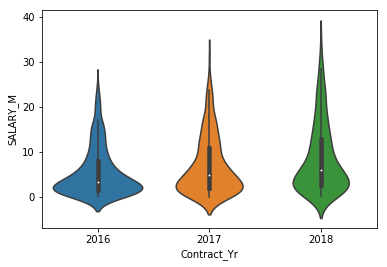

In [168]:
sns.violinplot(data=DF_Modeling, x="Contract_Yr", y="SALARY_M");

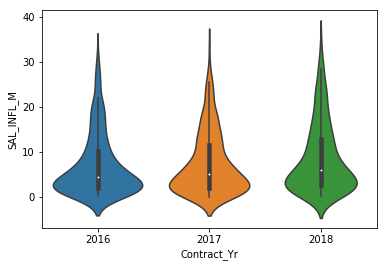

In [171]:
sns.violinplot(data=DF_Modeling, x="Contract_Yr", y="SAL_INFL_M");

## STOP!

#### MOdeling!

In [354]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [355]:
DF_Modeling.shape

(1048, 112)

In [356]:
drop_cols2

['Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [357]:
drop_cols = list(data_advanced_15_17.columns[1:])
drop_cols2 = list(data_per_min_15_17.columns[3:-1])

DF_Modeling2 = DF_Modeling.drop(drop_cols, 1)
DF_Modeling2.drop(drop_cols2, 1, inplace=True)

# NEED TO DROP MORE COLUMNS
#data_per_min_15_17

In [358]:
DF_Modeling2.Pos.value_counts()

PF    227
SG    220
PG    205
SF    205
C     191
Name: Pos, dtype: int64

In [359]:
DF_Modeling2.head()

,NAME,TEAM,SALARY,Contract_Yr,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,Pos,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Bench_Player,SAL_INFL,Log_SAL,Log_SAL_INFL,Center,PowerFwd,PointG,SmallFwd
0,"Stephen Curry, PG",Golden State Warriors,34382550.0,2018,STEPHEN CURRY,4x All Star,2015-16 NBA Scoring Champ,Stephen Curry,190.0,75.0,1.0,1.0,PG,28.033333,0.643667,0.527667,0.250667,2.666667,12.133333,7.633333,34.500000,2.866667,0.466667,13.400000,30.533333,11.333333,4.033333,15.400000,0.278333,9.933333,0.000000,9.900000,7.966667,79.333333,79.333333,2650.333333,9.633333,19.833333,0.486333,4.566667,10.500000,0.436000,5.100000,9.333333,0.543667,4.466667,4.933333,0.906667,0.833333,4.233333,5.066667,7.566667,2.133333,0.200000,3.400000,2.266667,28.400000,8.0,0,34382550.0,17.353060,2.853769,0,0,1,0
1,"LeBron James, SF",Cleveland Cavaliers,33285709.0,2018,LEBRON JAMES,13x All Star,2007-08 NBA Scoring Champ,LeBron James,250.0,80.0,0.0,1.0,SF,26.800000,0.594667,0.239333,0.385000,3.700000,18.700000,11.333333,38.633333,1.966667,1.466667,14.866667,31.233333,8.933333,3.300000,12.300000,0.220667,6.633333,1.700000,8.300000,6.933333,73.000000,73.000000,2665.333333,9.433333,18.200000,0.518667,1.500000,4.333333,0.342000,7.933333,13.866667,0.573333,4.933333,6.966667,0.705000,1.133333,6.100000,7.233333,7.500000,1.400000,0.666667,3.700000,1.833333,25.300000,14.0,0,33285709.0,17.320639,2.851899,0,0,0,1
2,"Paul Millsap, PF",Denver Nuggets,31269231.0,2018,PAUL MILLSAP,4x All Star,2015-16 All-Defensive,Paul Millsap,246.0,80.0,1.0,1.0,PF,19.700000,0.554333,0.232667,0.387333,6.866667,20.333333,13.733333,16.566667,2.466667,2.933333,12.900000,24.166667,3.566667,4.700000,8.266667,0.160333,1.066667,2.966667,4.066667,3.766667,74.333333,73.666667,2460.000000,6.700000,14.466667,0.462667,1.133333,3.400000,0.328667,5.600000,11.100000,0.503667,4.266667,5.600000,0.760667,2.166667,6.766667,8.933333,3.633333,1.800000,1.300000,2.500000,3.033333,18.733333,11.0,0,31269231.0,17.258145,2.848284,0,1,0,0
3,"Gordon Hayward, SF",Boston Celtics,29727900.0,2018,GORDON HAYWARD,1x All Star,None,Gordon Hayward,226.0,80.0,1.0,1.0,SF,20.233333,0.573667,0.323000,0.397667,2.400000,14.300000,8.400000,19.366667,1.800000,0.766667,11.900000,26.500000,6.133333,3.200000,9.333333,0.168333,3.366667,0.000000,3.366667,3.633333,76.333333,76.333333,2675.666667,7.000000,15.466667,0.449667,1.866667,5.000000,0.370333,5.133333,10.500000,0.488000,5.100000,6.133333,0.826667,0.733333,4.500000,5.200000,3.866667,1.233333,0.333333,2.433333,1.933333,20.866667,7.0,0,29727900.0,17.207597,2.845351,0,0,0,1
4,"Blake Griffin, PF",LA Clippers,29512900.0,2018,BLAKE GRIFFIN,5x All Star,4x All-NBA,Blake Griffin,251.0,82.0,1.0,1.0,PF,22.500000,0.554667,0.056000,0.376333,5.700000,20.133333,13.066667,25.966667,1.333333,1.066667,10.633333,28.733333,4.733333,2.133333,6.833333,0.172667,2.666667,1.300000,3.933333,2.866667,54.333333,54.333333,1867.333333,8.800000,17.633333,0.498000,0.366667,1.000000,0.356333,8.433333,16.666667,0.507333,4.866667,6.600000,0.738333,1.800000,6.666667,8.466667,5.266667,0.966667,0.466667,2.466667,2.866667,22.733333,7.0,0,29512900.0,17.200338,2.844929,0,1,0,0


In [361]:
auto_correlations = DF_Modeling2.corr()

In [362]:
auto_correlations['SALARY'].sort_values(ascending=False)

SALARY          1.000000
SAL_INFL        0.999752
Log_SAL         0.816434
Log_SAL_INFL    0.775374
WS_3AVG         0.726933
OWS_3AVG        0.683747
VORP_3AVG       0.675991
GS_3AVG         0.625573
DWS_3AVG        0.622396
MP_3AVG         0.619911
BPM_3AVG        0.590934
PER_3AVG        0.585337
OBPM_3AVG       0.563954
PTS_3AVG        0.535761
FG_3AVG         0.495303
WS/48_3AVG      0.490070
FT_3AVG         0.470549
USG%_3AVG       0.430209
FTA_3AVG        0.408701
2P_3AVG         0.392729
Award_Ind       0.389625
FGA_3AVG        0.389334
Exp_Yrs_Real    0.384706
G_3AVG          0.378721
2PA_3AVG        0.346197
TS%_3AVG        0.335709
AST%_3AVG       0.276571
FG%_3AVG        0.249218
AST_3AVG        0.229111
2P%_3AVG        0.219961
FT%_3AVG        0.218187
DBPM_3AVG       0.208436
Contract_Yr     0.194157
FTr_3AVG        0.189613
TOV_3AVG        0.166657
DRB_3AVG        0.150293
DRB%_3AVG       0.140674
3P%_3AVG        0.124649
weight          0.102430
TRB%_3AVG       0.091441


In [320]:
DF_Modeling2.corr()

,SALARY,Contract_Yr,weight,height_in,College_Ind,Award_Ind,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Bench_Player,SAL_INFL,Log_SAL,Log_SAL_INFL,C,PG,SF
SALARY,1.000000,0.194157,0.102430,0.048643,-0.085259,0.389625,0.585337,0.335709,-0.100430,0.189613,-0.009029,0.140674,0.091441,0.276571,0.050197,0.026647,-0.125120,0.430209,0.683747,0.622396,0.726933,0.490070,0.563954,0.208436,0.590934,0.675991,0.378721,0.625573,0.619911,0.495303,0.389334,0.249218,0.078940,0.027566,0.124649,0.392729,0.346197,0.219961,0.470549,0.408701,0.218187,-0.017718,0.150293,0.089434,0.229111,0.043407,0.026721,0.166657,-0.297858,0.535761,0.384706,-0.417279,0.999752,0.816434,0.775374,0.055313,-0.007809,0.025484
Contract_Yr,0.194157,1.000000,-0.007809,0.019929,-0.021045,-0.025321,0.016550,0.049231,0.068204,-0.023243,-0.029023,0.042061,0.014184,-0.000570,-0.017500,0.014835,-0.083618,-0.005786,0.010500,0.012179,0.012172,0.016244,0.014718,0.025853,0.027094,0.018967,0.009349,0.007326,0.003439,0.035491,0.031577,0.011600,0.073296,0.074834,0.058766,-0.008765,-0.026229,0.034942,0.012112,-0.000666,-0.012577,-0.020396,0.057553,0.028525,0.012235,0.000701,0.000525,-0.048881,-0.042877,0.047080,0.081853,-0.007931,0.178533,0.166587,0.158107,0.030124,-0.023269,0.018123
weight,0.102430,-0.007809,1.000000,0.826364,-0.164110,0.024791,0.225886,0.180643,-0.496570,0.281684,0.684060,0.691928,0.736844,-0.536732,-0.304809,0.551523,-0.100921,-0.083339,0.092865,0.233850,0.155459,0.260533,-0.154957,0.416542,0.109171,0.081957,0.023341,0.078900,-0.020219,0.132938,-0.106821,0.441892,-0.470578,-0.511524,-0.445749,0.375392,0.285008,0.312406,0.067644,0.168948,-0.221094,0.682073,0.689671,0.735231,-0.557962,-0.291738,0.556884,-0.159502,0.393627,0.011751,0.069036,-0.098753,0.103576,0.117595,0.116091,0.569629,-0.601605,-0.007953
height_in,0.048643,0.019929,0.826364,1.000000,-0.225759,-0.045810,0.145294,0.168350,-0.451395,0.259159,0.680841,0.696917,0.738228,-0.633447,-0.297213,0.614667,-0.102661,-0.164626,0.018044,0.187228,0.084348,0.201039,-0.231727,0.438098,0.057535,0.022500,0.006024,0.040124,-0.063936,0.048538,-0.177713,0.417903,-0.450946,-0.482862,-0.428431,0.290334,0.196837,0.307185,0.002656,0.106948,-0.252238,0.677954,0.691682,0.735222,-0.648397,-0.284670,0.614669,-0.209465,0.418060,-0.067260,-0.033025,-0.055229,0.049007,0.076150,0.077394,0.575566,-0.673221,0.069621
College_Ind,-0.085259,-0.021045,-0.164110,-0.225759,1.000000,-0.077239,-0.089186,-0.117172,0.097039,-0.128622,-0.132661,-0.184440,-0.176057,0.006969,0.089315,-0.118405,-0.155275,-0.017655,-0.082099,-0.109610,-0.100528,-0.083407,-0.001034,-0.082582,-0.048406,-0.047250,-0.083745,-0.070031,-0.050128,-0.038865,0.034999,-0.153342,0.085920,0.098937,0.081451,-0.080763,-0.041208,-0.137896,-0.044610,-0.071040,0.011497,-0.125753,-0.176685,-0.167522,0.004960,0.086159,-0.117941,-0.110234,-0.084418,-0.023766,-0.105151,0.056858,-0.085900,-0.107691,-0.106348,-0.225180,0.054749,0.030216
Award_Ind,0.389625,-0.025321,0.024791,-0.045810,-0.077239,1.000000,0.422033,0.215701,-0.111694,0.155463,-0.017237,0.066165,0.038629,0.288133,0.078065,0.048722,0.012055,0.345931,0.409399,0.486781,0.478509,0.327614,0.397457,0.184435,0.437918,0.438729,0.349494,0.477788,0.506187,0.361877,0.300612,0.165205,0.027917,-0.012206,0.080396,0.303356,0.292218,0.108459,0.348774,0.305610,0.173695,-0.024685,0.072913,0.037013,0.260631,0.070976,0.057516,0.223399,-0.166883,0.386185,0.393610,-0.337277,0.391895,0.370787,0.356066,0.091509,0.097055,-0.062408
PER_3AVG,0.585337,0.016550,0.225886,0.145294,-0.089186,0.422033,1.000000,0.643980,-0.359939,0.355559,0.290642,0.371878,0.367083,0.290646,0.096453,0.277907,-0.200581,0

In [363]:
DF_Modeling2.columns.tolist()

['NAME',
 'TEAM',
 'SALARY',
 'Contract_Yr',
 'Player_Match',
 'bling1',
 'bling2',
 'name',
 'weight',
 'height_in',
 'College_Ind',
 'Award_Ind',
 'Pos',
 'PER_3AVG',
 'TS%_3AVG',
 '3PAr_3AVG',
 'FTr_3AVG',
 'ORB%_3AVG',
 'DRB%_3AVG',
 'TRB%_3AVG',
 'AST%_3AVG',
 'STL%_3AVG',
 'BLK%_3AVG',
 'TOV%_3AVG',
 'USG%_3AVG',
 'OWS_3AVG',
 'DWS_3AVG',
 'WS_3AVG',
 'WS/48_3AVG',
 'OBPM_3AVG',
 'DBPM_3AVG',
 'BPM_3AVG',
 'VORP_3AVG',
 'G_3AVG',
 'GS_3AVG',
 'MP_3AVG',
 'FG_3AVG',
 'FGA_3AVG',
 'FG%_3AVG',
 '3P_3AVG',
 '3PA_3AVG',
 '3P%_3AVG',
 '2P_3AVG',
 '2PA_3AVG',
 '2P%_3AVG',
 'FT_3AVG',
 'FTA_3AVG',
 'FT%_3AVG',
 'ORB_3AVG',
 'DRB_3AVG',
 'TRB_3AVG',
 'AST_3AVG',
 'STL_3AVG',
 'BLK_3AVG',
 'TOV_3AVG',
 'PF_3AVG',
 'PTS_3AVG',
 'Exp_Yrs_Real',
 'Bench_Player',
 'SAL_INFL',
 'Log_SAL',
 'Log_SAL_INFL',
 'Center',
 'PowerFwd',
 'PointG',
 'SmallFwd']

### Pair Plots

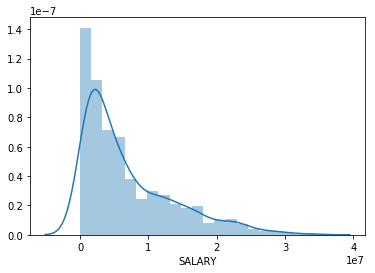

In [86]:
sns.distplot(DF_Modeling2.SALARY);


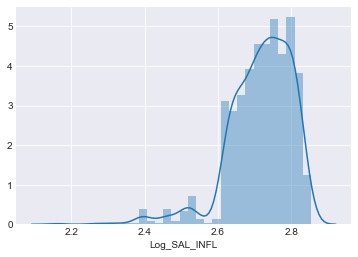

In [270]:
sns.distplot(DF_Modeling2.Log_SAL_INFL);

In [290]:
DF_Modeling2.columns

Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Bench_Player', 'SAL_INFL', 'Log_SAL', 'Log_SAL_INFL'],
      dtype='object')

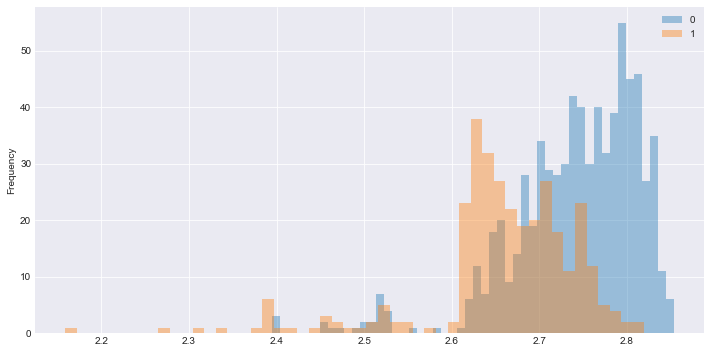

In [308]:
group_bench = DF_Modeling2.groupby('Bench_Player')['Log_SAL_INFL'] # group values by carrier, select minutes delayed
group_bench.plot(kind='hist', figsize=[12,6], bins=50, alpha=.4, legend=True); # alpha for transparency
  
#sns.distplot(DF_Modeling2.Log_SAL_INFL, );

In [309]:
DF_Modeling2.Bench_Player.value_counts()

0    728
1    320
Name: Bench_Player, dtype: int64

In [272]:
x = DF_Modeling2[DF_Modeling2['Log_SAL_INFL'] < 2.6]

In [273]:
x.describe()

,SALARY,Contract_Yr,weight,height_in,College_Ind,Award_Ind,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,SAL_INFL,Log_SAL,Log_SAL_INFL
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,191728.610169,2016.762712,213.983051,78.288136,0.915254,0.237288,10.563418,0.492424,0.319233,0.253008,4.512994,13.201695,8.826695,12.893644,1.562288,1.206921,13.763559,17.581215,0.647034,0.679096,1.325847,0.043691,-2.309322,-0.854379,-3.162994,0.116384,43.706215,14.816384,857.663842,4.439548,11.035876,0.408458,1.156497,3.637571,0.263144,3.279096,7.397175,0.437520,1.935028,2.675141,0.690381,1.458192,4.250847,5.719209,2.986441,1.099435,0.552260,1.900000,3.449718,11.961017,4.610169,196766.416088,11.859444,2.470088
std,135493.069802,0.727276,24.575353,3.543089,0.280894,0.429072,4.030556,0.075507,0.234462,0.121827,3.986957,5.483750,4.342914,9.046394,0.676259,1.485315,5.065628,4.797765,1.270091,0.632189,1.710225,0.073907,2.739208,1.783525,3.205516,0.652403,24.469943,21.738336,712.837693,1.229708,3.069381,0.078937,1.037690,2.748670,0.169425,1.411001,3.127509,0.097520,1.043410,1.412897,0.185513,1.267394,1.790242,2.806202,2.064215,0.465207,0.676943,0.833609,1.540462,3.433649,4.205977,139114.248052,0.901261,0.080026
min,5767.000000,2016.000000,165.000000,70.000000,0.000000,0.000000,-2.200000,0.239000,0.000000,0.000000,0.000000,3.200000,1.600000,0.000000,0.000000,0.000000,1.400000,8.675000,-0.866667,0.000000,-0.300000,-0.364000,-15.100000,-4.550000,-18.800000,-0.800000,1.000000,0.000000,25.000000,1.400000,5.366667,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.900000,2.900000,-2.000000,5882.340000,8.659907,2.158704
25%,71067.500000,2016.000000,195.000000,75.500000,1.000000,0.000000,8.900000,0.457125,0.140250,0.171167,1.750000,9.637500,5.925000,6.112500,1.200000,0.287500,10.133333,14.437500,-0.183333,0.200000,0.075000,0.021750,-3.475000,-1.725000,-4.512500,-0.200000,20.500000,0.333333,224.250000,3.700000,8.900000,0.366000,0.200000,1.333333,0.168333,2.225000,5.441667,0.400500,1.133333,1.700000,0.645500,0.583333,3.033333,3.816667,1.483333,0.833333,0.133333,1.400000,2.450000,9.458333,1.000000,71817.500000,11.169852,2.413206
50%,200600.000000,2017.000000,218.000000,79.000000,1.000000,0.000000,10.725000,0.498333,0.290000,0.243000,3.200000,11.825000,7.250000,10.075000,1.433333,0.700000,13.925000,17.133333,0.150000,0.566667,0.625000,0.051500,-2.075000,-1.100000,-2.850000,-0.050000,46.666667,4.333333,726.666667,4.400000,10.850000,0.409667,1.000000,3.650000,0.286000,3.366667,7.200000,0.451000,1.933333,2.400000,0.723000,1.100000,3.700000,4.733333,2.233333,1.033333,0.300000,1.866667,3.150000,12.033333,3.000000,207722.000000,12.209068,2.502179
75%,254619.500000,2017.000000,225.500000,81.000000,1.000000,0.000000,13.100000,0.541750,0.472375,0.303500,5.066667,15.500000,10.725000,17.975000,1.937500,1.625000,17.737500,19.666667,1.300000,0.966667,1.950000,0.082792,-1.033333,0.054167,-1.408333,0.216667,65.166667,15.000000,1310.000000,5.233333,12.150000,0.442000,1.783333,4.975000,0.352167,4.300000,9.233333,0.488667,2.65

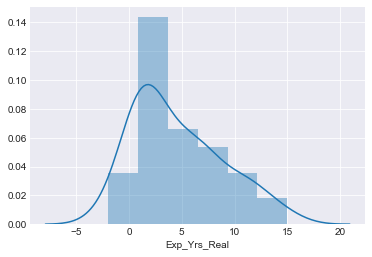

In [274]:
sns.distplot(x.Exp_Yrs_Real);

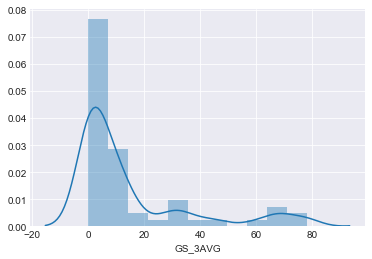

In [275]:
sns.distplot(x.GS_3AVG);

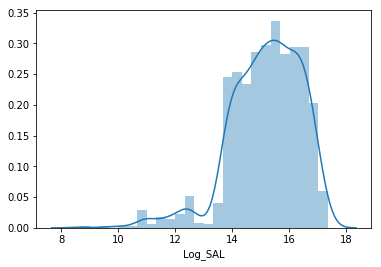

In [87]:
sns.distplot(DF_Modeling2.Log_SAL);

In [88]:
DF_Modeling2.columns

Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Log_SAL'],
      dtype='object')

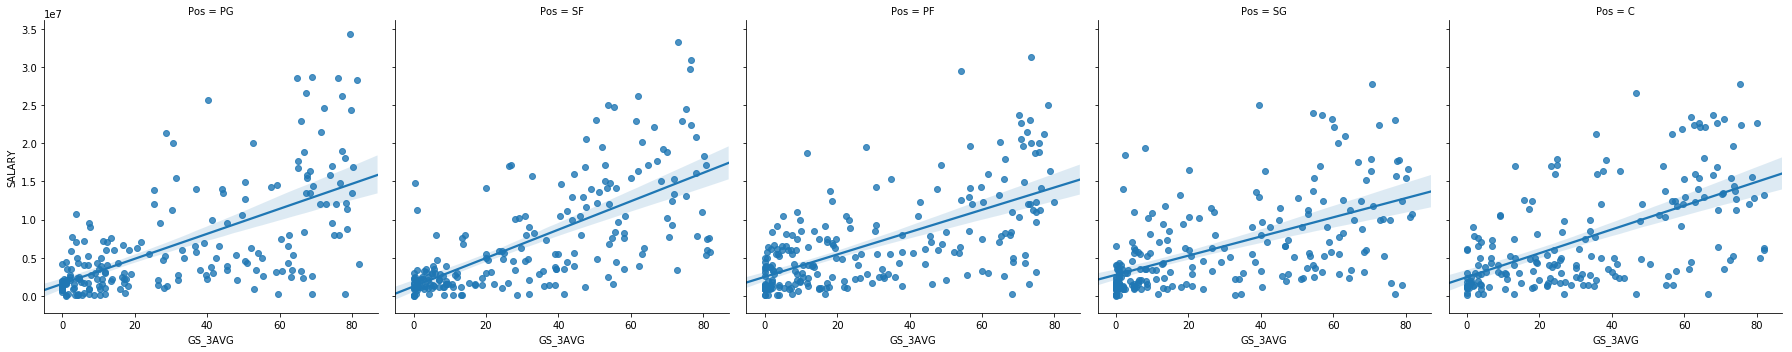

In [90]:
sns.lmplot(x="GS_3AVG",
           y ="SALARY",
           col = "Pos",
           data = DF_Modeling2);


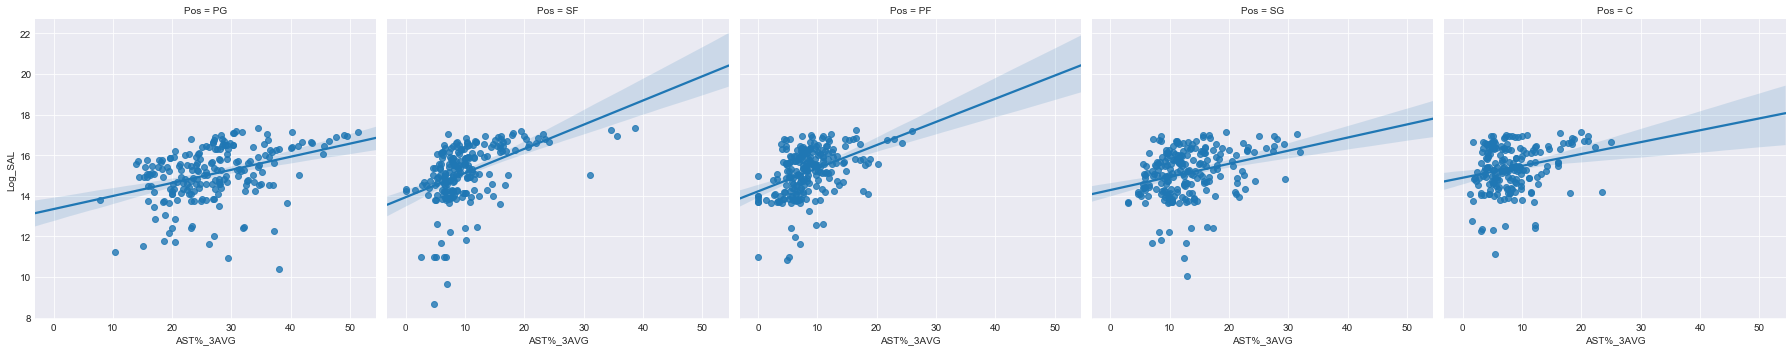

In [164]:
sns.lmplot(x="AST%_3AVG",
           y ="Log_SAL",
           col = "Pos",
           data = DF_Modeling2);


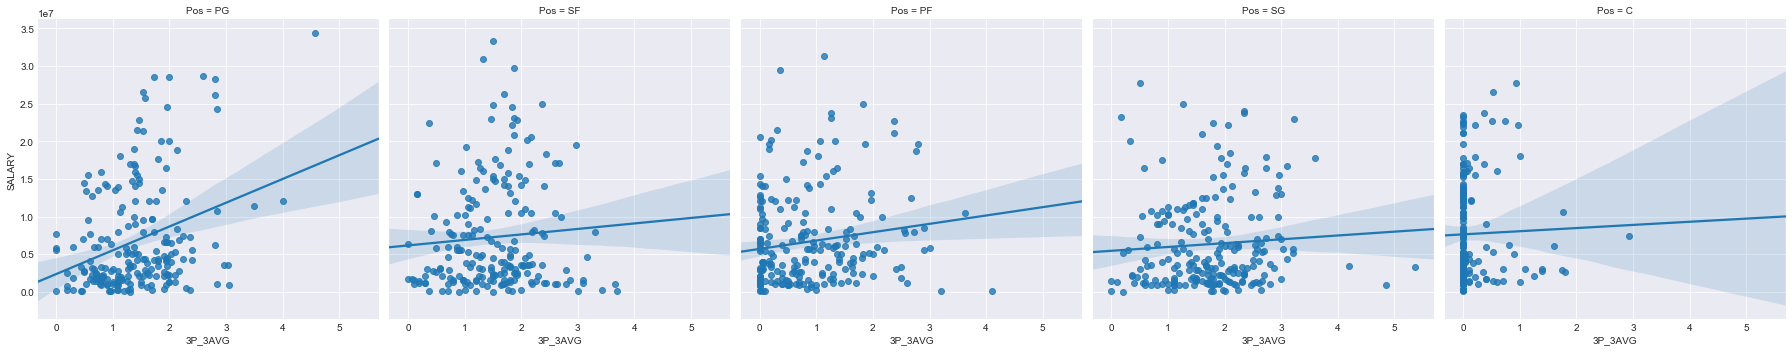

In [167]:


sns.lmplot(x="3P_3AVG",
           y ="SALARY",
           col = "Pos",
           data = DF_Modeling2);


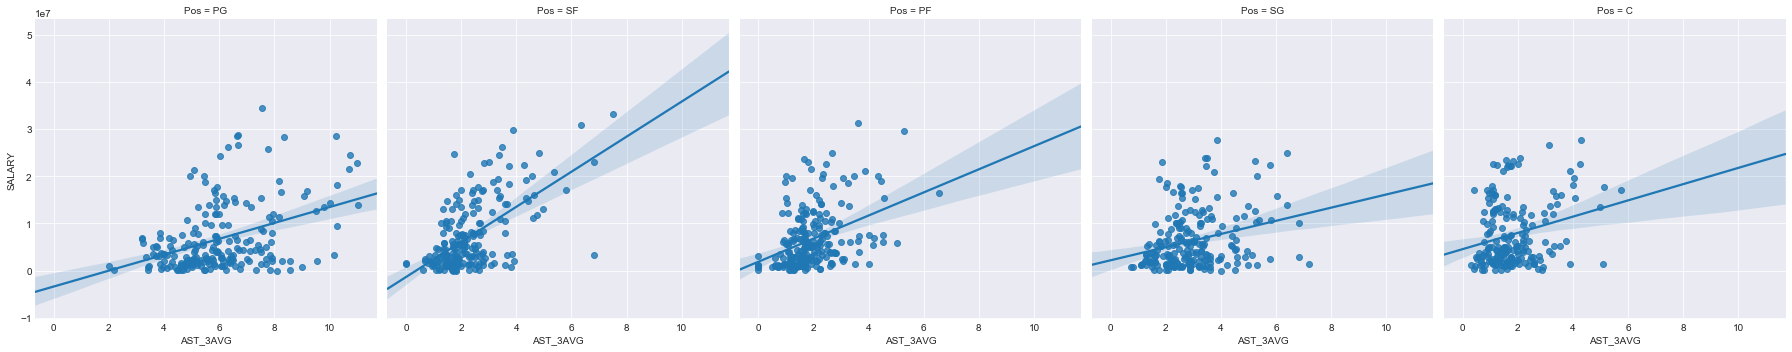

In [168]:
sns.lmplot(x="AST_3AVG",
           y ="SALARY",
           col = "Pos",
           data = DF_Modeling2);

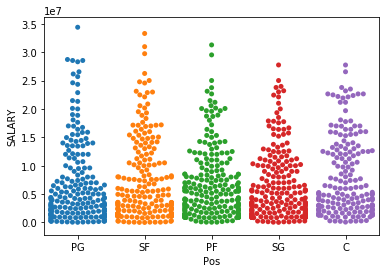

In [91]:
sns.swarmplot(data=DF_Modeling2, x="Pos", y="SALARY");

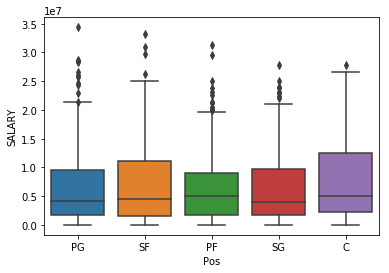

In [92]:
sns.boxplot(data=DF_Modeling2, x="Pos", y="SALARY");

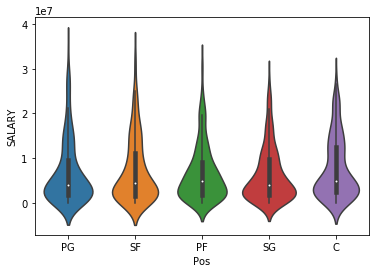

In [93]:
sns.violinplot(data=DF_Modeling2, x="Pos", y="SALARY");

In [136]:
DF_Modeling2.columns

Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Log_SAL'],
      dtype='object')

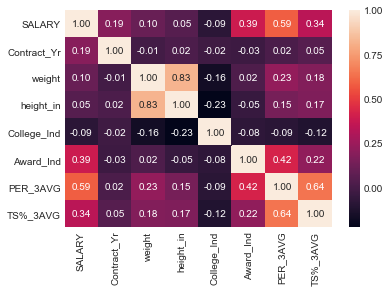

In [146]:

sns.heatmap(DF_Modeling2[DF_Modeling2.columns.tolist()[2:15]].corr(), annot=True, fmt=".2f");

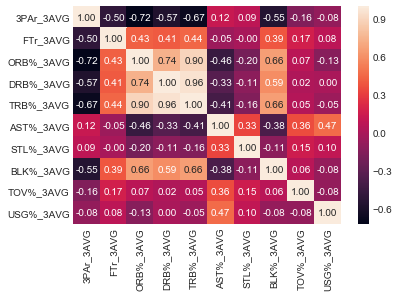

In [149]:
sns.heatmap(DF_Modeling2[DF_Modeling2.columns.tolist()[15:25]].corr(), annot=True, fmt=".2f");

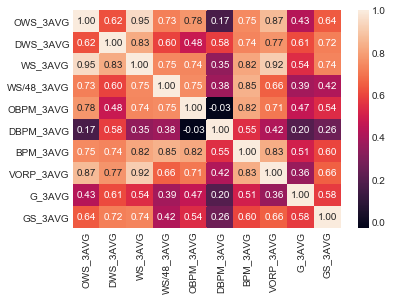

In [154]:
sns.heatmap(DF_Modeling2[DF_Modeling2.columns.tolist()[25:35]].corr(), annot=True, fmt=".2f");

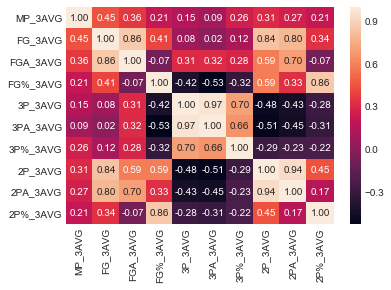

In [155]:
sns.heatmap(DF_Modeling2[DF_Modeling2.columns.tolist()[35:45]].corr(), annot=True, fmt=".2f");

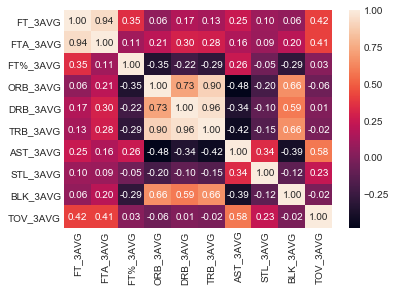

In [158]:
sns.heatmap(DF_Modeling2[DF_Modeling2.columns.tolist()[45:55]].corr(), annot=True, fmt=".2f");

In [141]:
DF_Modeling2[2:5]

,NAME,TEAM,SALARY,Contract_Yr,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,Pos,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real,Log_SAL
2,"Paul Millsap, PF",Denver Nuggets,31269231.0,2018,PAUL MILLSAP,4x All Star,2015-16 All-Defensive,Paul Millsap,246.0,80.0,1.0,1.0,PF,19.700000,0.554333,0.232667,0.387333,6.866667,20.333333,13.733333,16.566667,2.466667,2.933333,12.900000,24.166667,3.566667,4.700000,8.266667,0.160333,1.066667,2.966667,4.066667,3.766667,74.333333,73.666667,2460.000000,6.7,14.466667,0.462667,1.133333,3.4,0.328667,5.600000,11.100000,0.503667,4.266667,5.600000,0.760667,2.166667,6.766667,8.933333,3.633333,1.800000,1.300000,2.500000,3.033333,18.733333,11.0,17.258145
3,"Gordon Hayward, SF",Boston Celtics,29727900.0,2018,GORDON HAYWARD,1x All Star,None,Gordon Hayward,226.0,80.0,1.0,1.0,SF,20.233333,0.573667,0.323000,0.397667,2.400000,14.300000,8.400000,19.366667,1.800000,0.766667,11.900000,26.500000,6.133333,3.200000,9.333333,0.168333,3.366667,0.000000,3.366667,3.633333,76.333333,76.333333,2675.666667,7.0,15.466667,0.449667,1.866667,5.0,0.370333,5.133333,10.500000,0.488000,5.100000,6.133333,0.826667,0.733333,4.500000,5.200000,3.866667,1.233333,0.333333,2.433333,1.933333,20.866667,7.0,17.207597
4,"Blake Griffin, PF",LA Clippers,29512900.0,2018,BLAKE GRIFFIN,5x All Star,4x All-NBA,Blake Griffin,251.0,82.0,1.0,1.0,PF,22.500000,0.554667,0.056000,0.376333,5.700000,20.133333,13.066667,25.966667,1.333333,1.066667,10.633333,28.733333,4.733333,2.133333,6.833333,0.172667,2.666667,1.300000,3.933333,2.866667,54.333333,54.333333,1867.333333,8.8,17.633333,0.498000,0.366667,1.0,0.356333,8.433333,16.666667,0.507333,4.866667,6.600000,0.738333,1.800000,6.666667,8.466667,5.266667,0.966667,0.466667,2.466667,2.866667,22.733333,7.0,17.200338


In [96]:
# create X and y except now with more columns in X
mult_feature_cols = ['GS_3AVG', 'OWS_3AVG', 'Exp_Yrs_Real', '2P_3AVG']
X_mult = DF_Modeling2[mult_feature_cols]
y_mult = DF_Modeling2.Log_SAL

# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients like last time
print(intercept)
print(coeffs)

13.8448597785
[ 0.01567502  0.14568343  0.04816886  0.08528198]


In [95]:
# Necessary imports
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
sns.set_style("darkgrid")
%pylab inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [148]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Log_SAL ~ GS_3AVG + OWS_3AVG + Exp_Yrs_Real', data=DF_Modeling2, return_type="dataframe")
#mult_feature_cols = ['GS_3AVG', 'OWS_3AVG', 'Exp_Yrs_Real', '2P_3AVG']
#X = DF_Modeling2[mult_feature_cols]
#y = DF_Modeling2.Log_SAL

model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log_SAL   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     230.9
Date:                Mon, 02 Oct 2017   Prob (F-statistic):          7.14e-115
Time:                        09:23:52   Log-Likelihood:                -1461.4
No. Observations:                1048   AIC:                             2931.
Df Residuals:                    1044   BIC:                             2951.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.1467      0.055    255.450      0.000      14.038      14.255
GS_3AVG          0.0166      0.001     11.180      0.000       0.014       0.019
OWS_3AVG         0.1698      0.021      7.991      0.000       0.128       0.212
Exp_Yrs_Real     0.0463      0.008      5.560      0.000       0.030       0.063
==============================================================================
Omnibus:                      370.678   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1515.804
Skew:                          -1.643   Prob(JB):                         0.00
Kurtosis:                       7.890   Cond. No.                         75.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
DF_Modeling2.columns

Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Log_SAL'],
      dtype='object')

In [323]:
# Create an empty model
lr = LinearRegression()

df_PG = DF_Modeling2[DF_Modeling2.Pos == 'SG']
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
# mult_feature_cols = ['GS_3AVG', 'OWS_3AVG', 'Exp_Yrs_Real', '2P_3AVG', '3P_3AVG', 'STL%_3AVG', 'AST%_3AVG']
mult_feature_cols = ['GS_3AVG', 'OWS_3AVG']
X = df_PG[mult_feature_cols]
y = df_PG['SALARY']

# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.4164372762648747

In [115]:
y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(y_mult, y_mult_pred)

0.40940665359034401

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult)

model= LinearRegression()
model.fit(X_train,y_train)
print(f"train r2: {model.score(X_train,y_train):.2%}, "
      f"test r2: {model.score(X_test,y_test):.2%}")

train r2: 53.87%, test r2: 55.11%


In [240]:
from sklearn.cross_validation import cross_val_score

In [237]:
# 10-fold cross-validation with our fake data
reg = LinearRegression()
scores = cross_val_score(reg, X_mult, y_mult, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[  8.22588501e+13   1.21113793e+13   9.52089194e+12   4.03631616e+13
   1.53162164e+13   1.06882424e+13   2.36346146e+13   1.85512203e+13
   1.45450393e+13   1.69501938e+13]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

#### Lasso Regression

In [365]:
from sklearn.model_selection import cross_val_score, train_test_split


In [369]:
DF_Modeling2.columns

Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Bench_Player', 'SAL_INFL', 'Log_SAL', 'Log_SAL_INFL',
       'Center', 'PowerFwd', 'PointG', 'SmallFwd'],
      dtype='object')

In [393]:
X_all_cols = DF_Modeling2.columns.tolist()[8:12] + \
             DF_Modeling2.columns.tolist()[25:35]+\
             DF_Modeling2.columns.tolist()[-4:]
#              DF_Modeling2.columns.tolist()[14:-7] + \
        
X_mult_all = DF_Modeling2[X_all_cols]
X_mult_all.head()

,weight,height_in,College_Ind,Award_Ind,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,Center,PowerFwd,PointG,SmallFwd
0,190.0,75.0,1.0,1.0,11.333333,4.033333,15.400000,0.278333,9.933333,0.000000,9.900000,7.966667,79.333333,79.333333,0,0,1,0
1,250.0,80.0,0.0,1.0,8.933333,3.300000,12.300000,0.220667,6.633333,1.700000,8.300000,6.933333,73.000000,73.000000,0,0,0,1
2,246.0,80.0,1.0,1.0,3.566667,4.700000,8.266667,0.160333,1.066667,2.966667,4.066667,3.766667,74.333333,73.666667,0,1,0,0
3,226.0,80.0,1.0,1.0,6.133333,3.200000,9.333333,0.168333,3.366667,0.000000,3.366667,3.633333,76.333333,76.333333,0,0,0,1
4,251.0,82.0,1.0,1.0,4.733333,2.133333,6.833333,0.172667,2.666667,1.300000,3.933333,2.866667,54.333333,54.333333,0,1,0,0


In [407]:
#generate the polynomial transformer
pf_2 = PolynomialFeatures(degree=2, interaction_only=True)

#apply it to the data, but ignore the first constant column
pf_2_data = pf_2.fit_transform(X_mult_all)


array([[   1.,  190.,   75., ...,    0.,    0.,    0.],
       [   1.,  250.,   80., ...,    0.,    0.,    0.],
       [   1.,  246.,   80., ...,    0.,    0.,    0.],
       ..., 
       [   1.,  190.,   77., ...,    0.,    0.,    0.],
       [   1.,  175.,   71., ...,    0.,    0.,    0.],
       [   1.,  218.,   81., ...,    0.,    0.,    0.]])

In [402]:
lasso = Lasso(max_iter=10000) #increase the number of iterations for lasso to prevent lack of convergence

mse_poly2_lasso = np.abs(cross_val_score(lasso, pf_2_data, y_mult, cv=10))
#rmses_lasso_poly3 = map(np.sqrt, mse_poly3_lasso)
rmses_lasso_poly2 = np.sqrt(mse_poly3_lasso)
print("10-fold mean RMSE for degree-3 case, strongest lasso regularization: ", np.mean(rmses_lasso_poly2))

10-fold mean RMSE for degree-3 case, strongest lasso regularization:  1.77075951266


In [403]:
mse_poly3_lasso

array([ 9.52761571,  8.99842531,  1.05776458,  0.49861077,  8.75894253,
        1.68016891,  0.26030968,  2.3140061 ,  3.9476289 ,  2.60032925])

In [404]:
np.sqrt(mse_poly3_lasso)

array([ 3.08668361,  2.99973754,  1.02847683,  0.70612377,  2.95955107,
        1.2962133 ,  0.51020553,  1.52118576,  1.98686409,  1.61255364])

In [405]:

lasso_all = Lasso().fit(pf_2_data, y_mult)
print( "Number of features in the model: ", len(lasso_all.coef_))
non_zero_features_mask = np.abs(lasso_all.coef_) > 0.0001  # create a mask of Booleans if the Coeff > 0.0001

print( non_zero_features_mask)
print( "Number of non-zero features in the model: ", np.sum(non_zero_features_mask.astype(int)))
print( "Fraction of total features used: ", float(np.sum(non_zero_features_mask.astype(int))) / len(lasso_all.coef_))

Number of features in the model:  172
[False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False  True False False  True False False  True  True
 False False False False False False False False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
coeff_df = pd.DataFrame(zip(housing_features, np.abs(lasso_all.coef_)), columns=["features","betas"])


In [227]:
DF_Modeling2.columns


Index(['NAME', 'TEAM', 'SALARY', 'Contract_Yr', 'Player_Match', 'bling1',
       'bling2', 'name', 'weight', 'height_in', 'College_Ind', 'Award_Ind',
       'Pos', 'PER_3AVG', 'TS%_3AVG', '3PAr_3AVG', 'FTr_3AVG', 'ORB%_3AVG',
       'DRB%_3AVG', 'TRB%_3AVG', 'AST%_3AVG', 'STL%_3AVG', 'BLK%_3AVG',
       'TOV%_3AVG', 'USG%_3AVG', 'OWS_3AVG', 'DWS_3AVG', 'WS_3AVG',
       'WS/48_3AVG', 'OBPM_3AVG', 'DBPM_3AVG', 'BPM_3AVG', 'VORP_3AVG',
       'G_3AVG', 'GS_3AVG', 'MP_3AVG', 'FG_3AVG', 'FGA_3AVG', 'FG%_3AVG',
       '3P_3AVG', '3PA_3AVG', '3P%_3AVG', '2P_3AVG', '2PA_3AVG', '2P%_3AVG',
       'FT_3AVG', 'FTA_3AVG', 'FT%_3AVG', 'ORB_3AVG', 'DRB_3AVG', 'TRB_3AVG',
       'AST_3AVG', 'STL_3AVG', 'BLK_3AVG', 'TOV_3AVG', 'PF_3AVG', 'PTS_3AVG',
       'Exp_Yrs_Real', 'Log_SAL'],
      dtype='object')

In [337]:
DF_Modeling2.columns.tolist()[8:12] + DF_Modeling2.columns.tolist()[13:]

['weight',
 'height_in',
 'College_Ind',
 'Award_Ind',
 'PER_3AVG',
 'TS%_3AVG',
 '3PAr_3AVG',
 'FTr_3AVG',
 'ORB%_3AVG',
 'DRB%_3AVG',
 'TRB%_3AVG',
 'AST%_3AVG',
 'STL%_3AVG',
 'BLK%_3AVG',
 'TOV%_3AVG',
 'USG%_3AVG',
 'OWS_3AVG',
 'DWS_3AVG',
 'WS_3AVG',
 'WS/48_3AVG',
 'OBPM_3AVG',
 'DBPM_3AVG',
 'BPM_3AVG',
 'VORP_3AVG',
 'G_3AVG',
 'GS_3AVG',
 'MP_3AVG',
 'FG_3AVG',
 'FGA_3AVG',
 'FG%_3AVG',
 '3P_3AVG',
 '3PA_3AVG',
 '3P%_3AVG',
 '2P_3AVG',
 '2PA_3AVG',
 '2P%_3AVG',
 'FT_3AVG',
 'FTA_3AVG',
 'FT%_3AVG',
 'ORB_3AVG',
 'DRB_3AVG',
 'TRB_3AVG',
 'AST_3AVG',
 'STL_3AVG',
 'BLK_3AVG',
 'TOV_3AVG',
 'PF_3AVG',
 'PTS_3AVG',
 'Exp_Yrs_Real',
 'Bench_Player',
 'SAL_INFL',
 'Log_SAL',
 'Log_SAL_INFL',
 'C',
 'PG',
 'SF']

In [ ]:
y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(y_mult, y_mult_pred)

In [71]:
DF_Modeling2[DF_Modeling2['3PAr_3AVG'] > 8]

,NAME,TEAM,SALARY,Contract_Yr,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real


In [72]:
DF_Modeling2[DF_Modeling2['FTr_3AVG'] > 4]

,NAME,TEAM,SALARY,Contract_Yr,Player_Match,bling1,bling2,name,weight,height_in,College_Ind,Award_Ind,PER_3AVG,TS%_3AVG,3PAr_3AVG,FTr_3AVG,ORB%_3AVG,DRB%_3AVG,TRB%_3AVG,AST%_3AVG,STL%_3AVG,BLK%_3AVG,TOV%_3AVG,USG%_3AVG,OWS_3AVG,DWS_3AVG,WS_3AVG,WS/48_3AVG,OBPM_3AVG,DBPM_3AVG,BPM_3AVG,VORP_3AVG,G_3AVG,GS_3AVG,MP_3AVG,FG_3AVG,FGA_3AVG,FG%_3AVG,3P_3AVG,3PA_3AVG,3P%_3AVG,2P_3AVG,2PA_3AVG,2P%_3AVG,FT_3AVG,FTA_3AVG,FT%_3AVG,ORB_3AVG,DRB_3AVG,TRB_3AVG,AST_3AVG,STL_3AVG,BLK_3AVG,TOV_3AVG,PF_3AVG,PTS_3AVG,Exp_Yrs_Real


In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn import datasets
sns.set_style("darkgrid")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [186]:

def f(x):
    return np.sin(2 * np.pi * x)

def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
#     ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

x_plot = np.linspace(0, 1, 100)

In [229]:
mult_feature_cols = ['GS_3AVG', 'OWS_3AVG', 'Exp_Yrs_Real', '2P_3AVG']
X_mult = DF_Modeling2[mult_feature_cols]
y_mult = DF_Modeling2.Log_SAL

In [230]:
X_mult.shape

(1048, 4)

In [231]:
y_mult = y_mult.values.reshape(-1,1)

In [232]:

X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size=0.8)


In [233]:
from sklearn.linear_model import LassoCV

In [236]:
lcv = LassoCV(cv = 10)

In [237]:

lcv.fit(X_mult, y_mult)
lcv.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.41630726761396303